# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the data
hotel_data = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

In [4]:
# Make copy of the data
data = hotel_data.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
# View the first few rows of the dataset
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [6]:
# View the last few rows of the dataset
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [7]:
# Check the shape of the dataset
print(data.shape)

(36275, 19)


In [8]:
# Use info() to find the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
# Use describe() to print a concise summary of the dataset
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


In [10]:
# Use the isnull() function to to see if there are any missing values in the data
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
# Use the isna() function to see if there are any duplicate values in the data
data.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Observations

* There are 36275 rows and 19 columns as described by the shape function.
* There are 14 numerical columns and 5 object-type columns.
* There appear to be no missing values.
* There appear to be no duplicate values.
* At least 75 percent of the customers do not require a parking space.
* At least 75 percnet of the customers are not repeat customers.
* The average lead time is 85 days, which is significantly higher than the median of 57 days, indicating a right skew to the distribution.
* Average price per room is a little over 103 per night.
* The data seems to only include the years of 2017 and 2018.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Univariate Analysis

In [12]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# Function to create a labeled bar plot
def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    hue: column to use for coloring the bars (default is None)
    """

    total = len(data[feature])  # Length of the Column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )   # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2   # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )   # Annotate the percentage

    plt.show()  # Show the plot

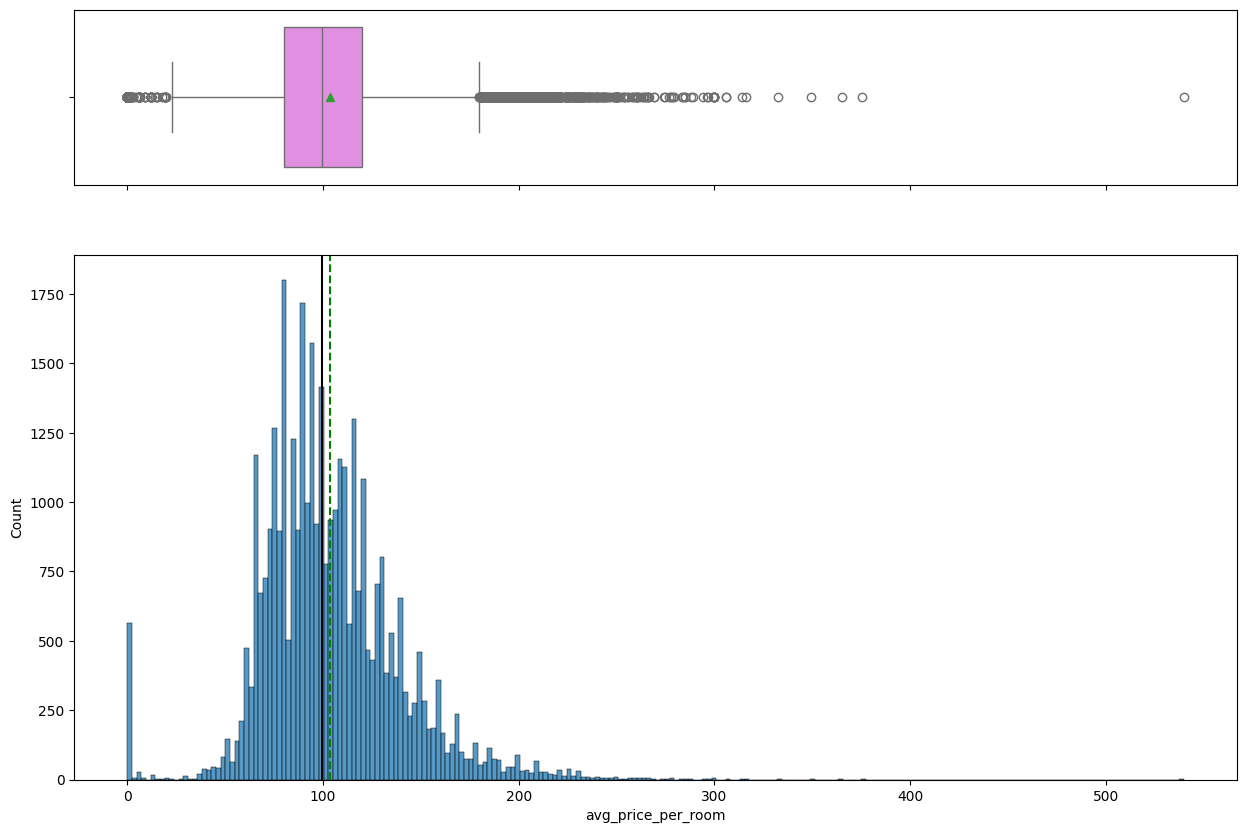

In [14]:
# Visualization of 'avg_price_per_room'
histogram_boxplot(data, "avg_price_per_room")

In [15]:
data[data["avg_price_per_room"] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [16]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [17]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [18]:
# Assign the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

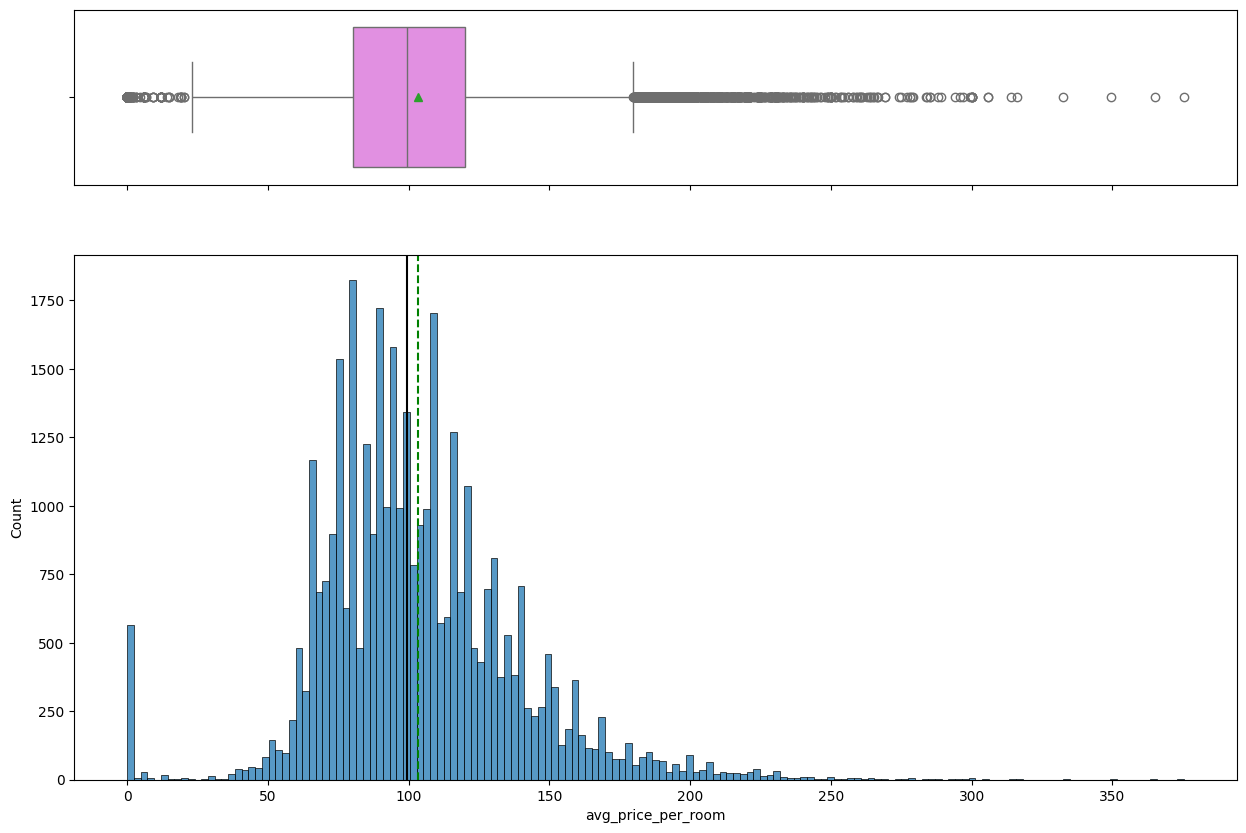

In [19]:
# Revisualization of 'avg_price_per_room'
histogram_boxplot(data, "avg_price_per_room")

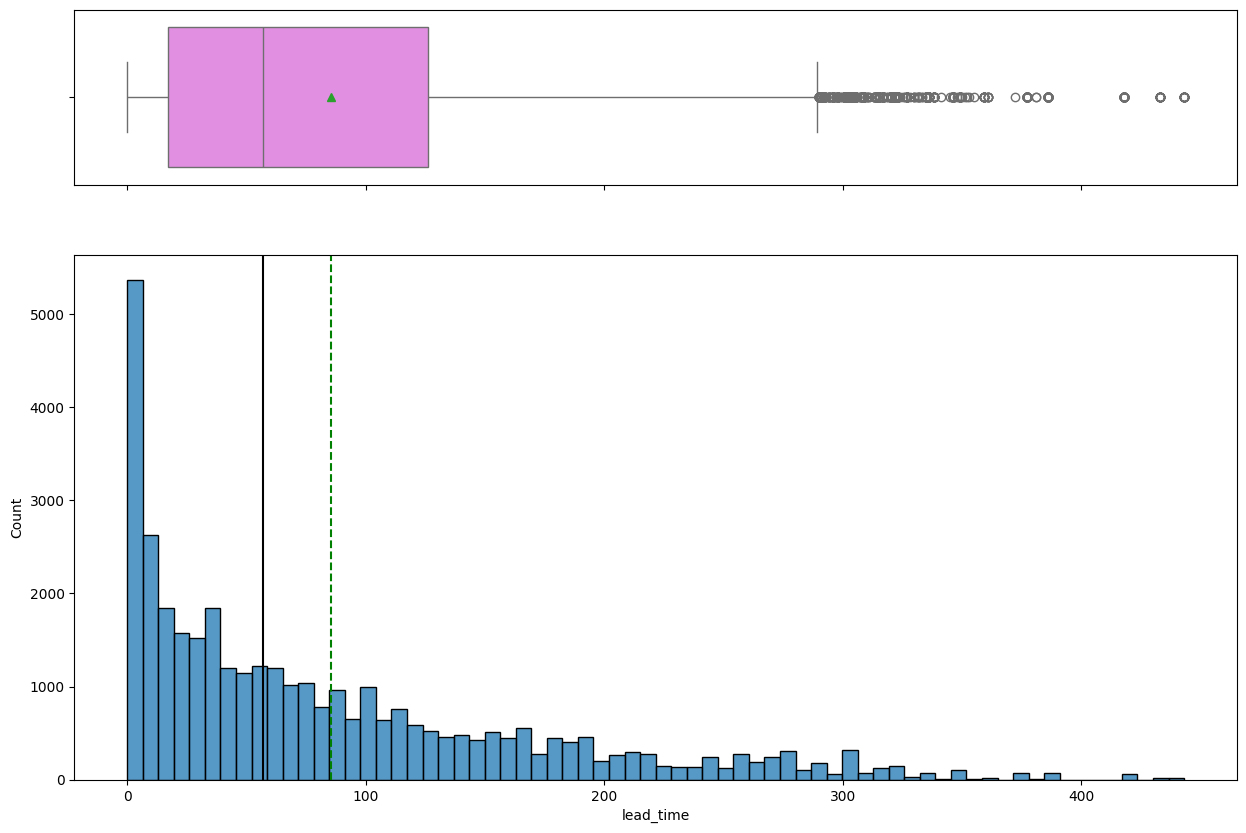

In [20]:
# Visualization of "lead_time"
histogram_boxplot(data, "lead_time")

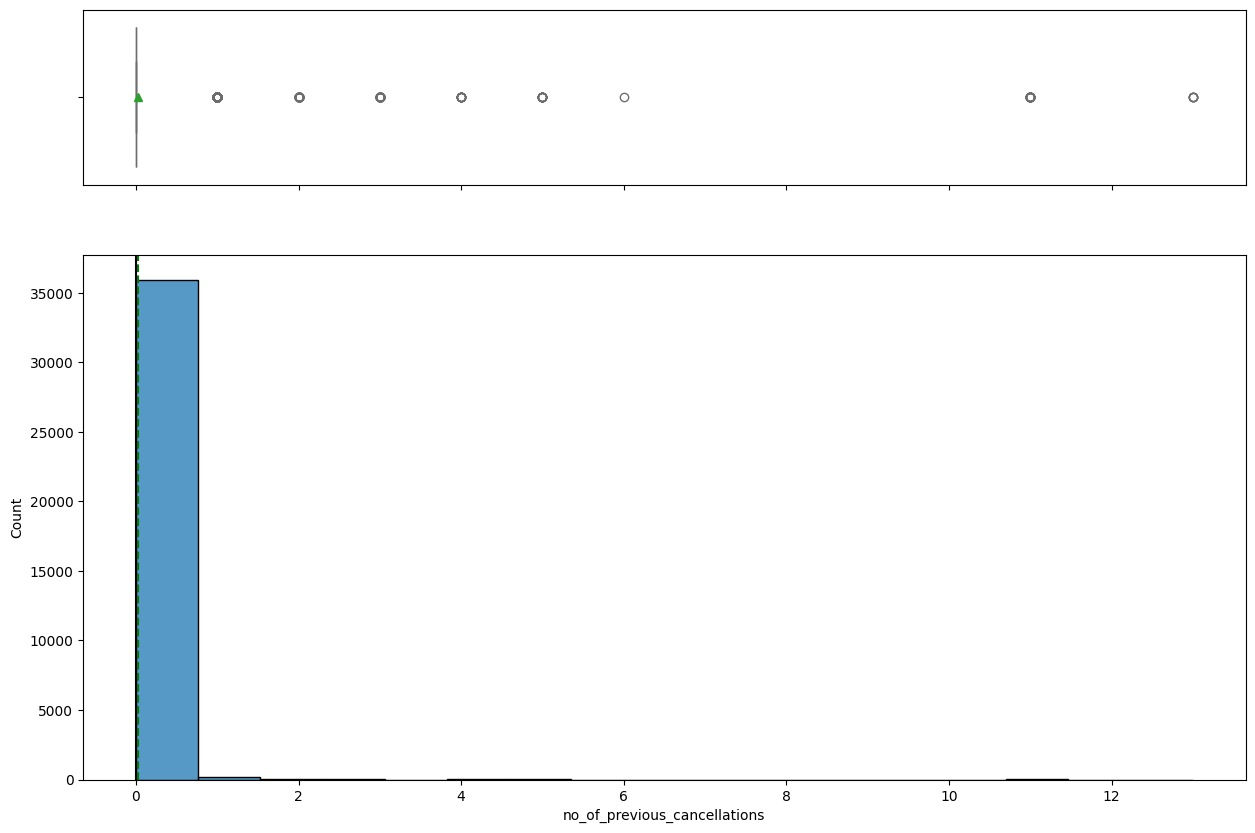

In [21]:
# Visualization of "no_of_previous_cancellations"
histogram_boxplot(data, "no_of_previous_cancellations")

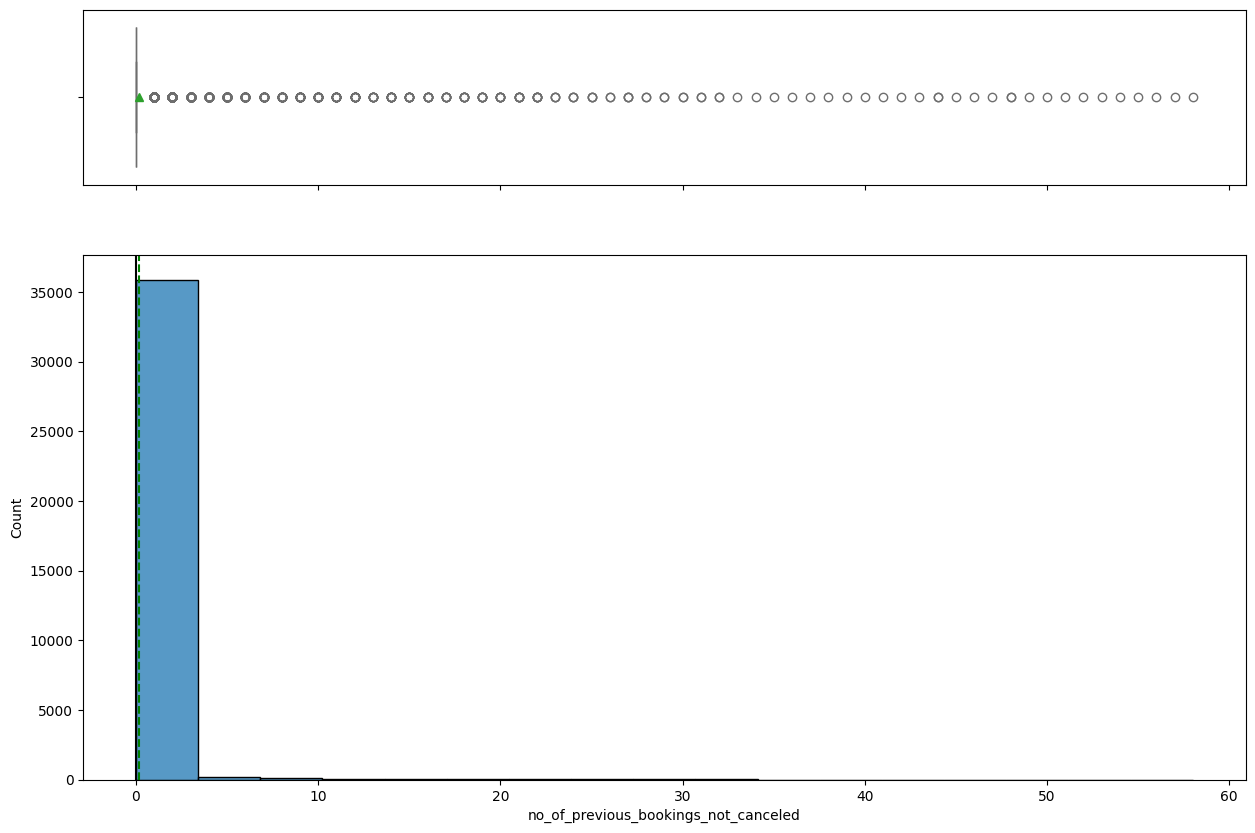

In [22]:
# Visualization of "no_of_previous_bookings_not_canceled"
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

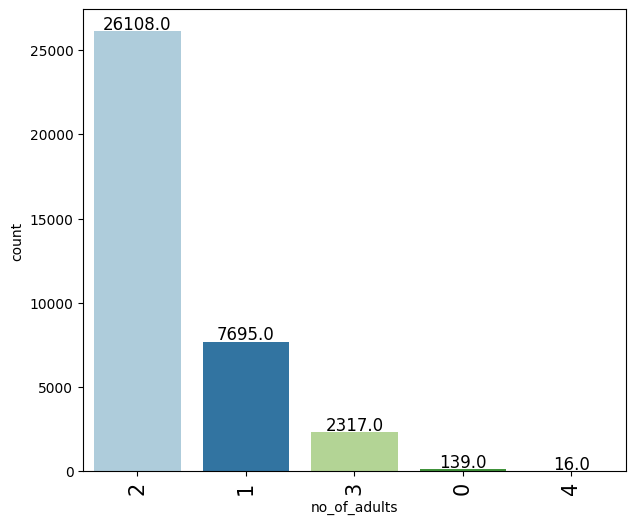

In [23]:
# Visualization of 'no_of_adults'
labeled_barplot(data, 'no_of_adults')

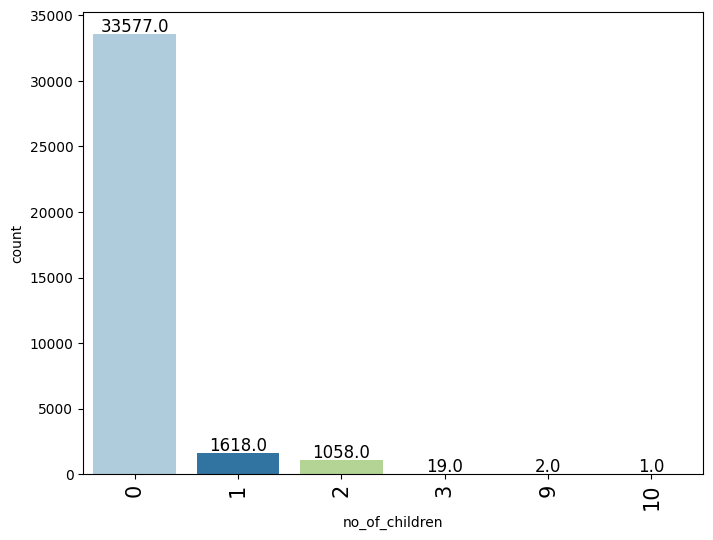

In [24]:
# Visualization of 'no_of_children'
labeled_barplot(data, 'no_of_children')

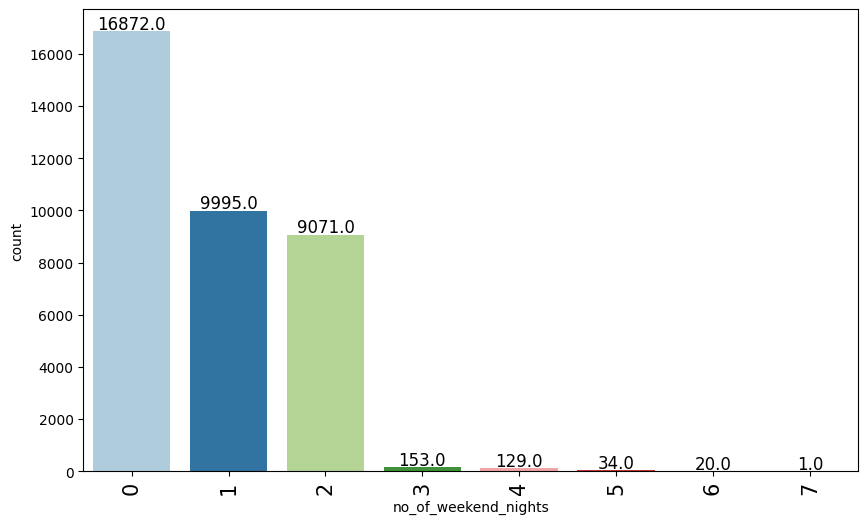

In [25]:
# Visualization of 'no_of_weekend_nights'
labeled_barplot(data, 'no_of_weekend_nights')

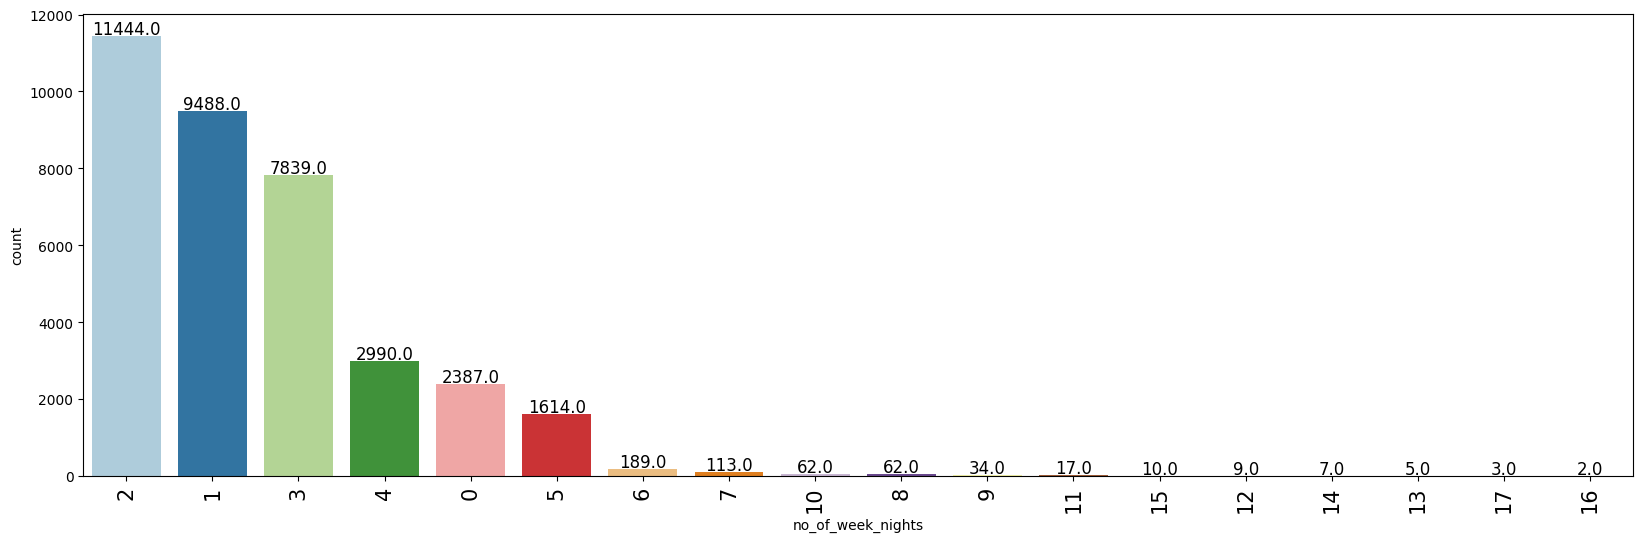

In [26]:
# Visualization of 'no_of_week_nights'
labeled_barplot(data, 'no_of_week_nights')

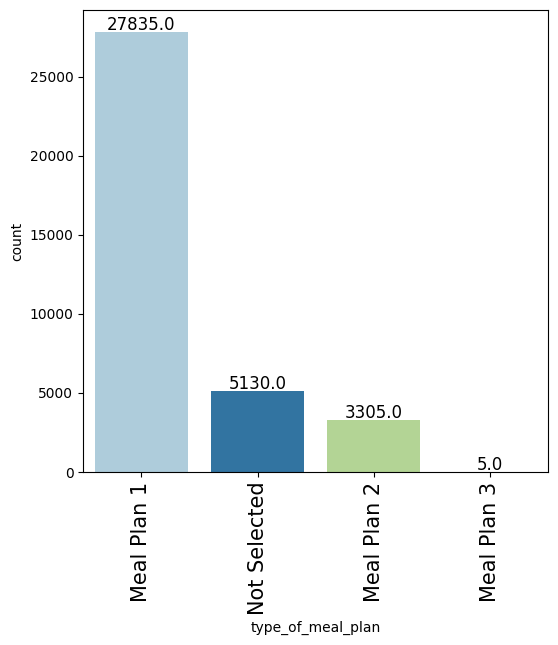

In [27]:
# Visualization of 'type_of_meal_plan'
labeled_barplot(data, 'type_of_meal_plan')

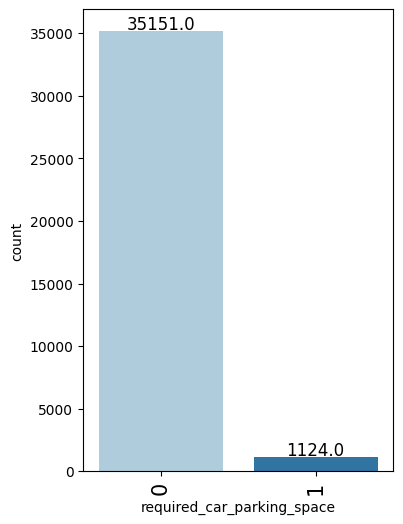

In [28]:
# Visualization of 'required_car_parking_space'
labeled_barplot(data, 'required_car_parking_space')

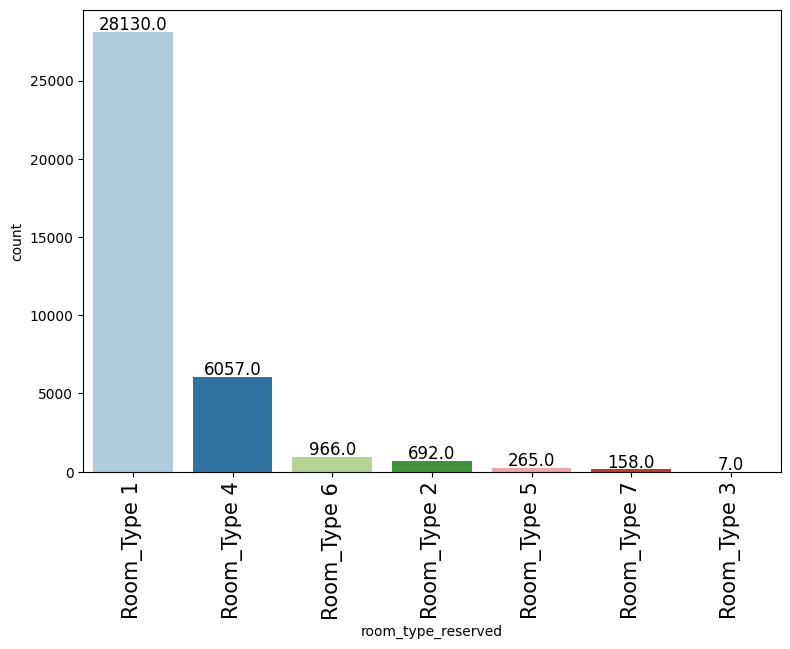

In [29]:
# Visualization of 'room_type_reserved'
labeled_barplot(data, 'room_type_reserved')

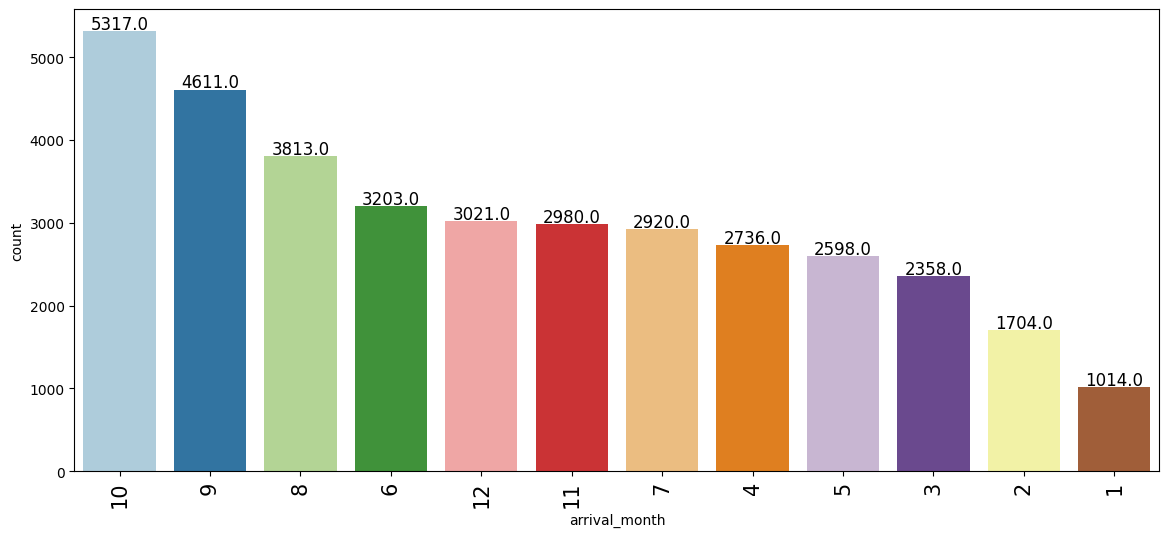

In [30]:
# Visualization of 'arrival_month'
labeled_barplot(data, 'arrival_month')

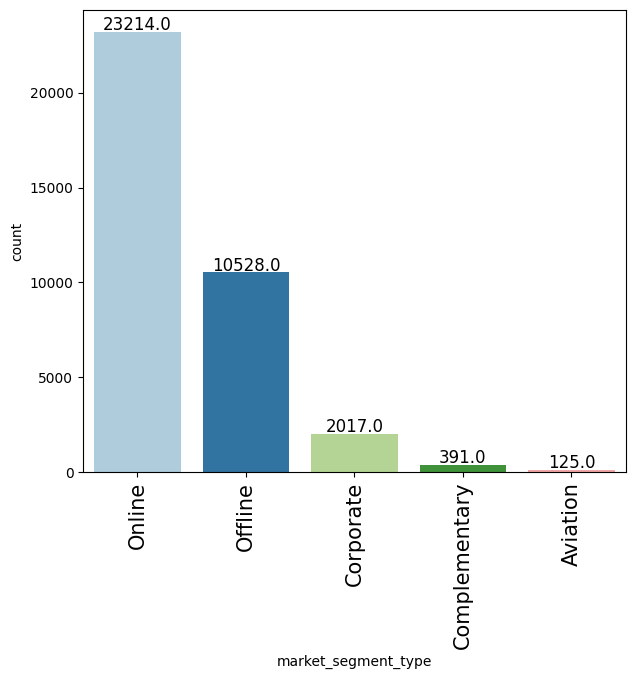

In [31]:
# Visualization of 'market_segment_type'
labeled_barplot(data, 'market_segment_type')

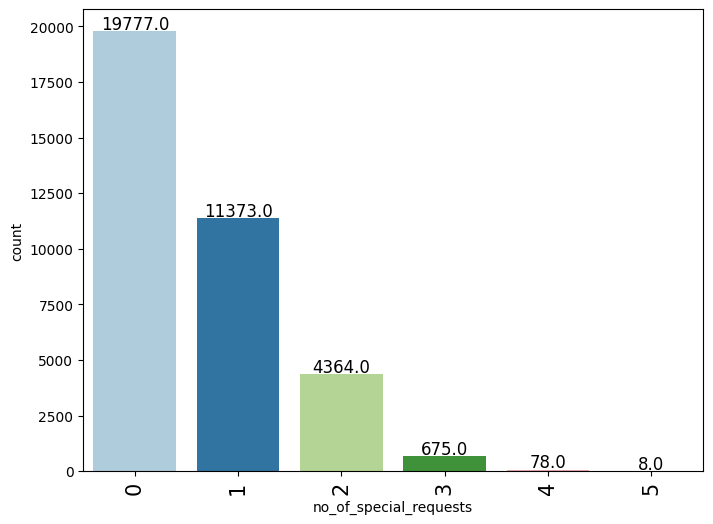

In [32]:
# Visualization of 'no_of_special_requests'
labeled_barplot(data, 'no_of_special_requests')

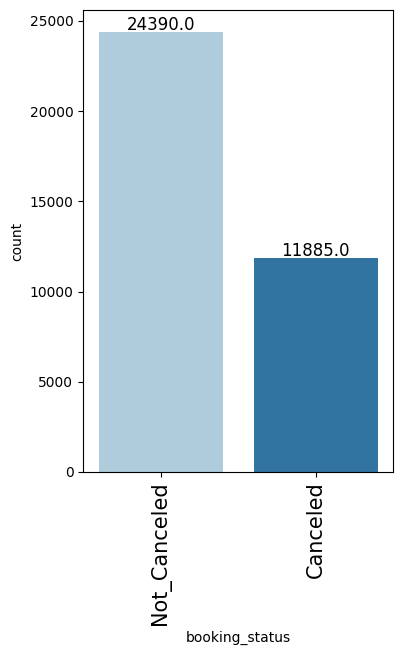

In [33]:
# Visualization of 'booking_status'
labeled_barplot(data, 'booking_status')

In [34]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

Observations:

* Average price per room has a distribution skewed slightly to the right, with numerous outliers. 75 percent of all rooms cost at least $80.30.
* Lead time also has a distribution that is skewed to the right, with numerous outliers on the high end. The interquartile range is 109, with 75 percent of all rooms being booked 126 days out or less.
* The mean and median for repeated_guest are both significantly less than 1 (0.026 and 0.158, respectively), meaning most bookings are not from repeat guests.
* The number of previous cancellations varies, with a range of 13. The mean is about 0.02, and the median is 0.
* The number of previous bookings not canceled has a range of 58. The mean is about 0.15, and the median is 0.
* The most common number of adults in a booking is two, at 26108 instances, or almost 72 percent of bookings in the data.
* Over 33500 bookings list zero children, which is almost 93 percent of bookings in the data.
* 16872 bookings (46.5 percent) have zero weekend nights, with 9995 (27.6 percent) having one weekend night, and 9071 (25.0 percent) having two weekend nights.
* 11444 bookings have two weeknights, accounting for about 31.5 percent of bookings. The next most common are one night (9488 instances, or 26.2 percent) and three nights (7839, or 21.6 percent).
* The vast majority of bookings included Meal Plan 1, at 27835 (76.7 percent). The next most common occurrence were bookings that did not select a meal plan, at 5130 instances, or 14.1 percent. Meal Plan 2 was included in 3305 bookings (9.1 percent), and Meal Plan 3 was included in only 5 bookings.
* An overwhelming majority of bookings (35151 or 96.9 percent) did not require a car parking space.
* The most common room type among bookings was Room Type 1, with 28130 bookings or 77.5 percent of the data. The second-most type of room was Room Type 4 at 6057 bookings, followed by Room Type 6 (966), Room Type 2 (692), Room Type 5 (265), Room Type 7 (158) and Room Type 3 (7).
* October was the most frequently occurring arrival month, with 5317 bookings or 14.7 percent. September was the next most common with 4611 bookings, followed by August (3813), June (3203) and December (3021) with at least 3000 bookings.
* Online was the most common market segment type, with 23214 bookings or 63.99 percent of the data.
* More than half of all bookings (19777 or 54.5 percent) did not have any special requests.
* About two-thirds of the bookings (24390 or 67.2 percent) were not canceled.


### Bivariate Analysis

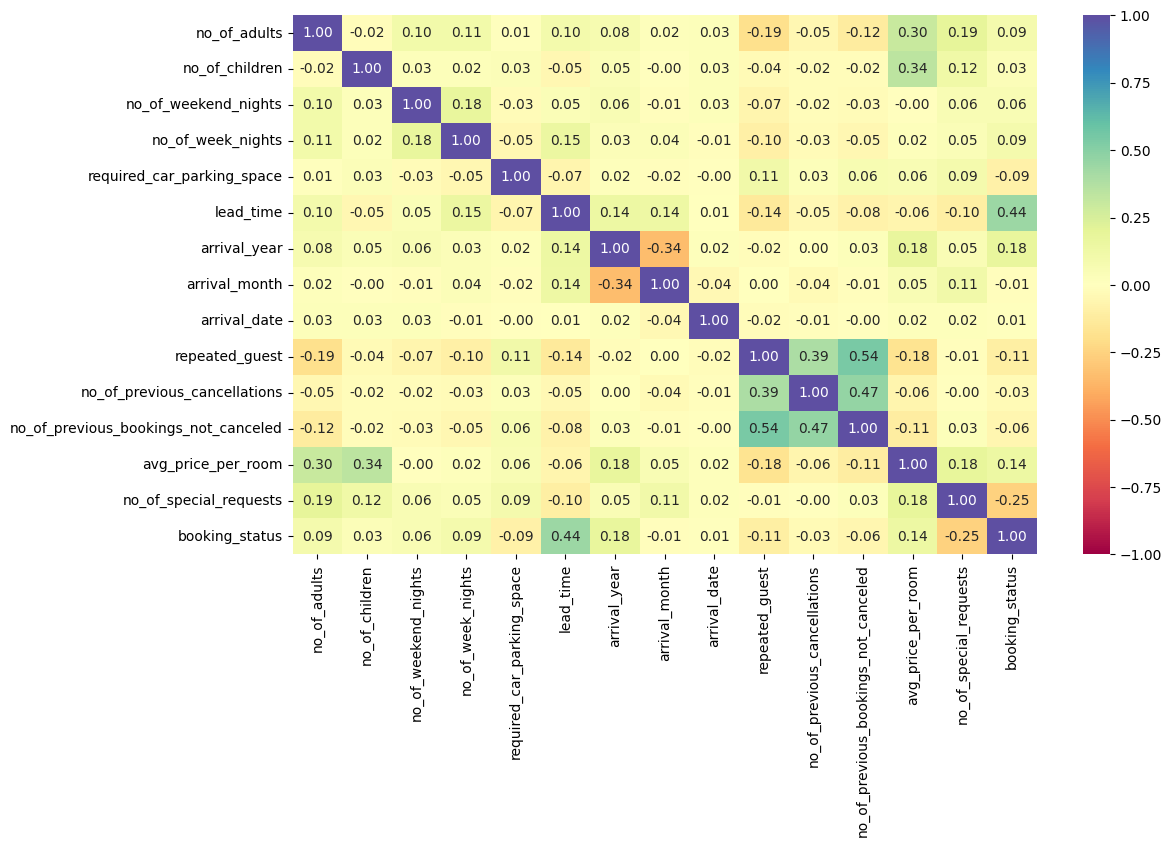

In [35]:
# Check correlation
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [36]:
# Function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [37]:
# Function to create a labeled bar plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

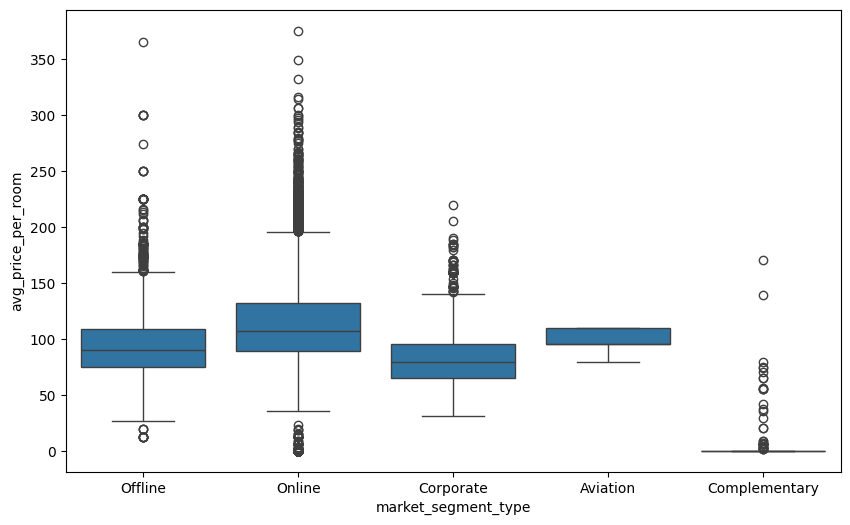

In [38]:
# Check avg room price across market segments with box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


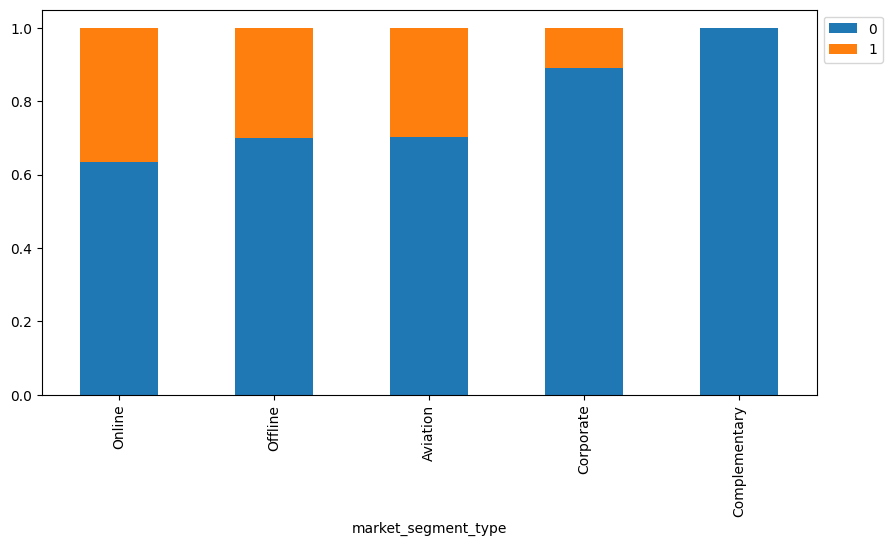

In [39]:
# Check booking statuses across market segments with stacked bar plot
stacked_barplot(data, "market_segment_type", "booking_status")

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


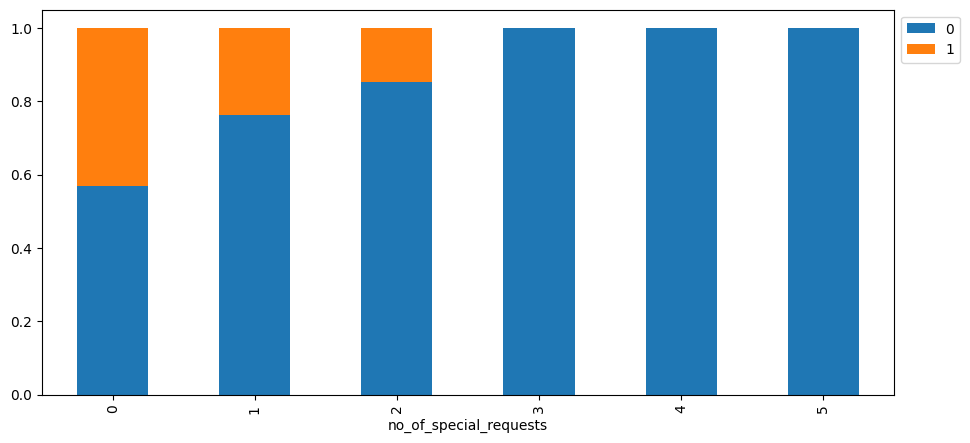

In [40]:
# Check how special requests impacts booking status with stacked bar plot
stacked_barplot(data, "no_of_special_requests", "booking_status")

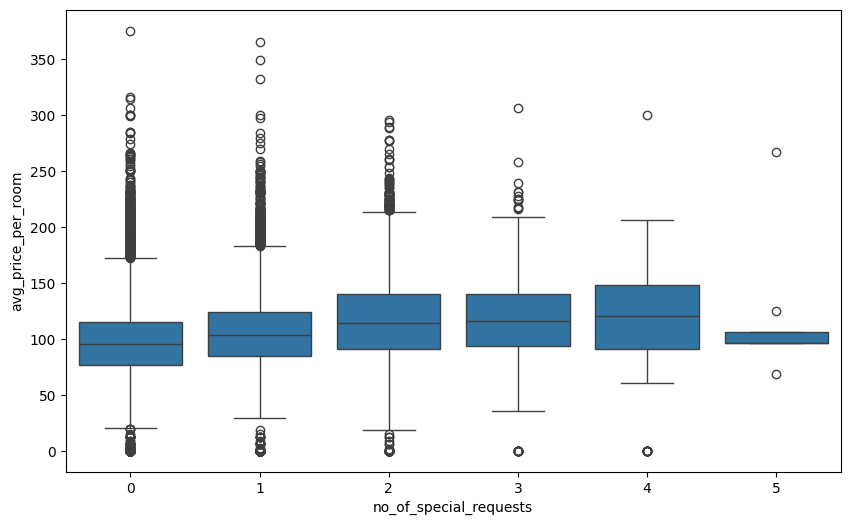

In [41]:
# Check how special requests impact avg room price with box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="no_of_special_requests", y="avg_price_per_room"
)
plt.show()

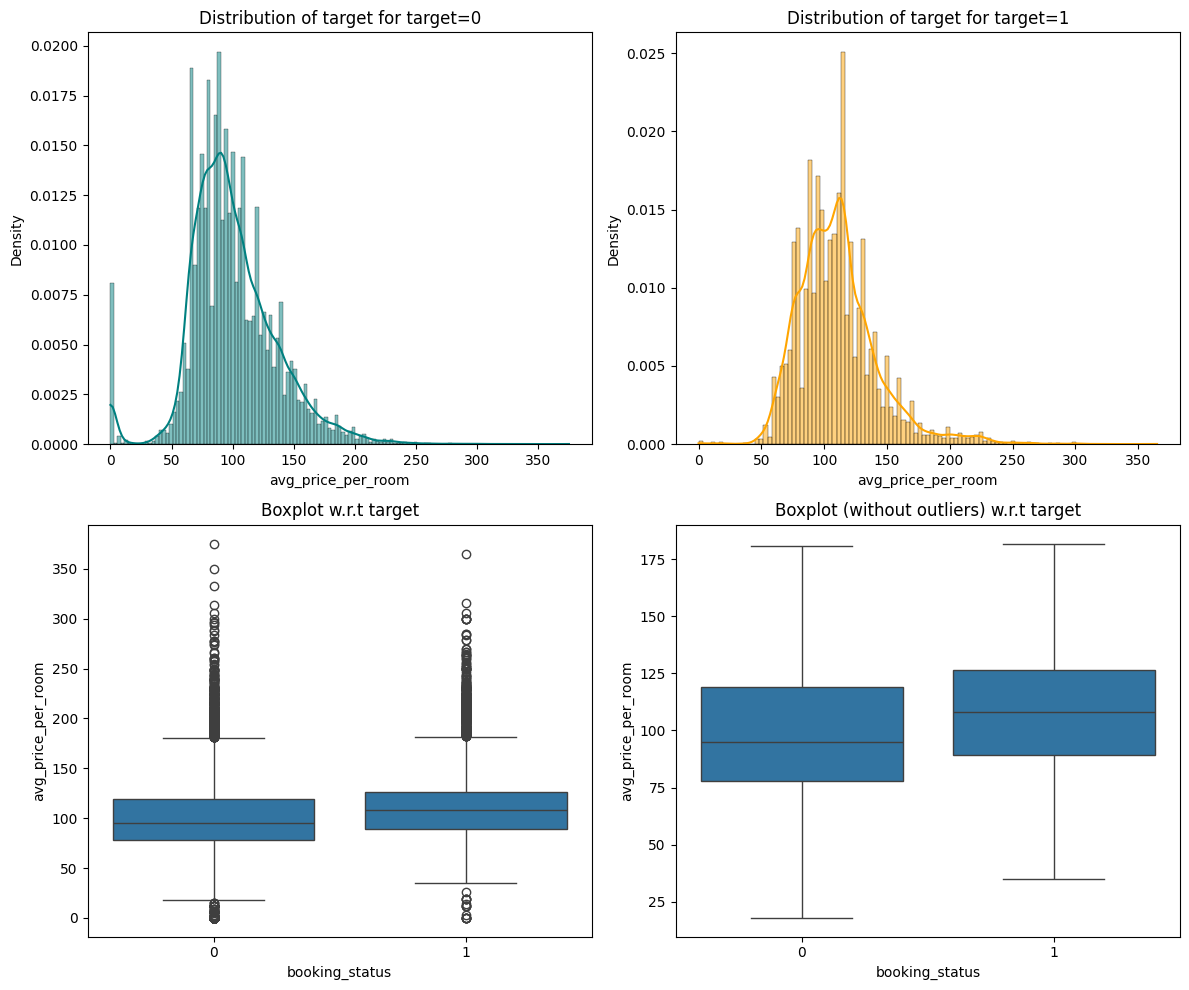

In [42]:
# Analyzing correlation between avg room price and booking status
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

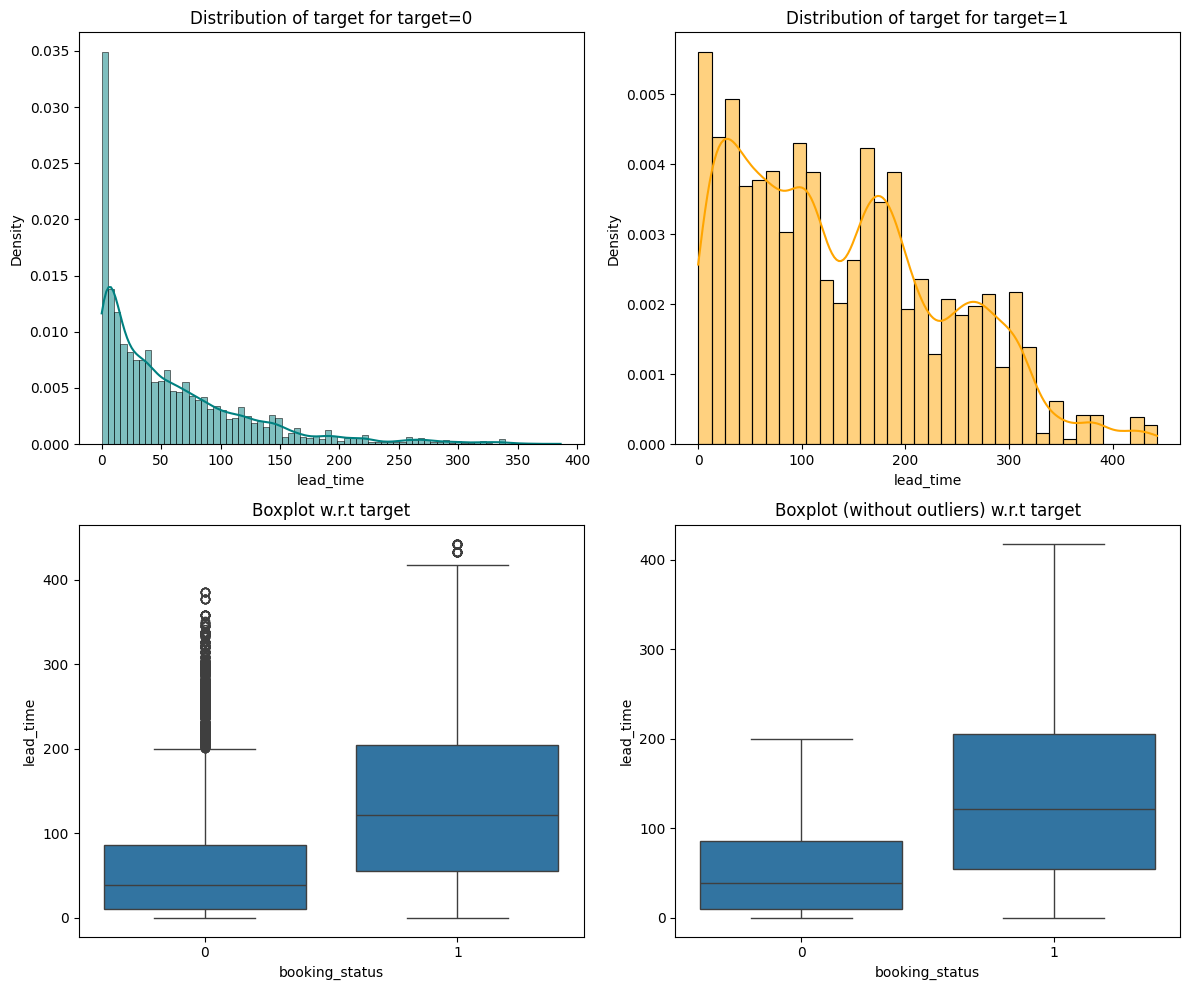

In [43]:
# Analyzing correlation between lead time and booking status
distribution_plot_wrt_target(data, "lead_time", "booking_status")

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


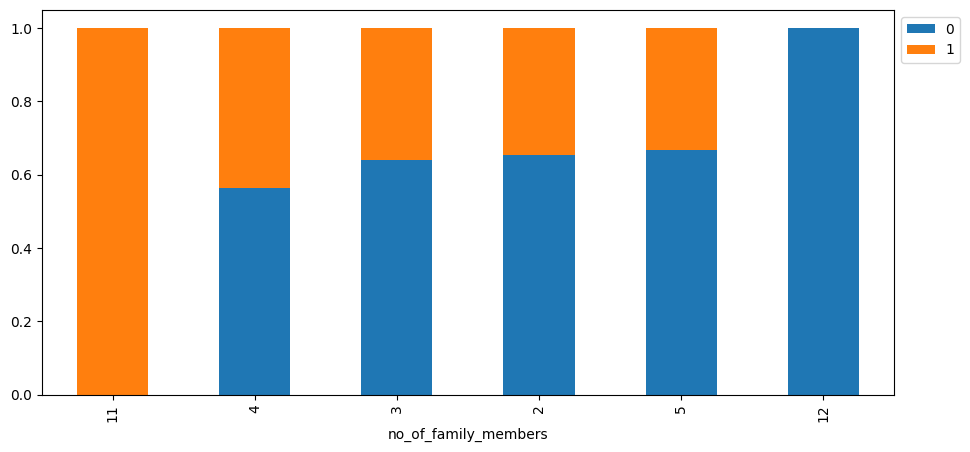

In [44]:
# Analyzing bookings that included families
# Create new dataframe that includes those that traveled with spouses and children
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape

family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

stacked_barplot(family_data, "no_of_family_members", "booking_status")

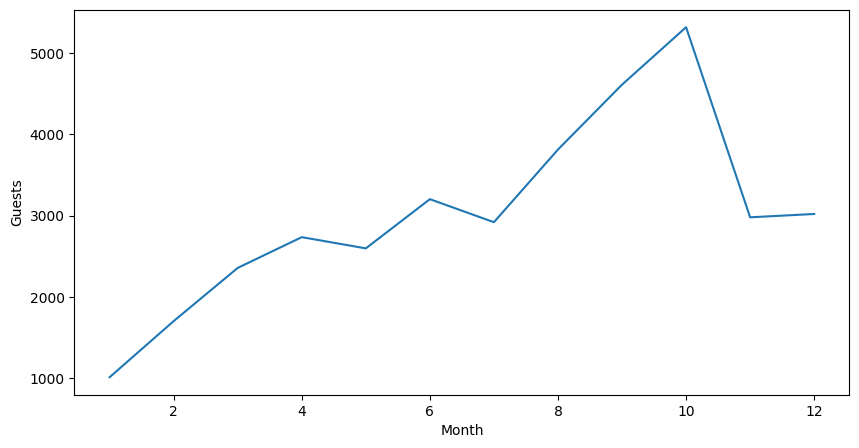

In [45]:
# Analyzing busiest months in the hotel
# Group data on arrival months and isolate the booking counts
month_data = data.groupby("arrival_month")["booking_status"].count()

# Create a DataFrame with months and count of customers in each month
month_data = pd.DataFrame({"Month": list(month_data.index), "Guests": list(month_data.values)})

# Show the plot over the calendar year
plt.figure(figsize=(10,5))
sns.lineplot(data=month_data, x="Month", y="Guests")
plt.show()

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

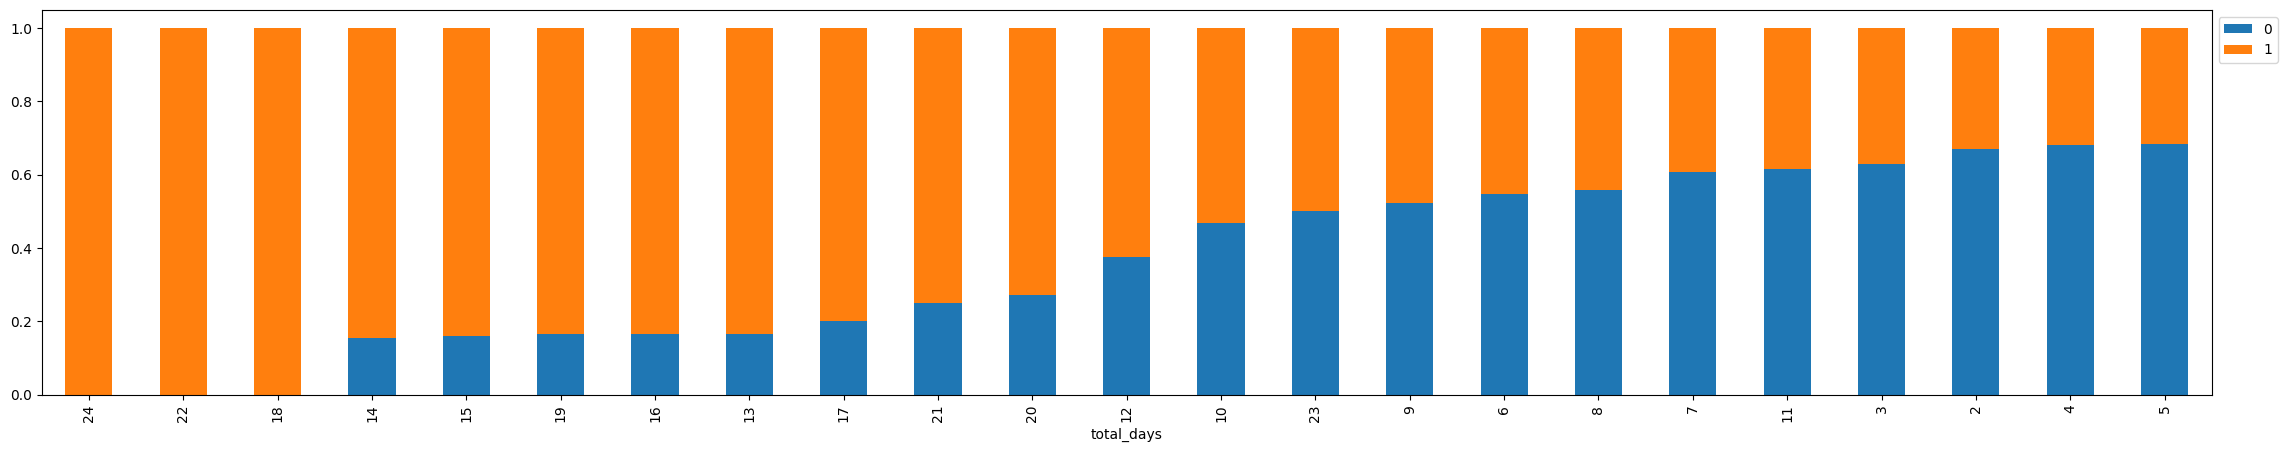

In [46]:
# Analyzing bookings that included at least a one day stay at the hotel
# Create new dataframe that includes those that stayed at least one weekday or one weekend day
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

stacked_barplot(stay_data, "total_days", "booking_status")

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------


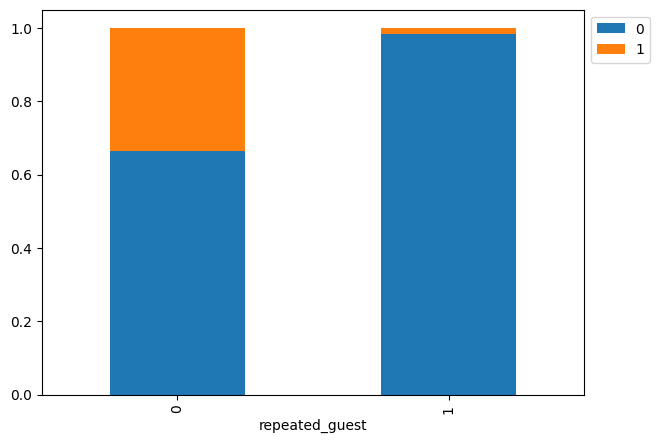

In [47]:
# Analyzing repeat guests who cancel bookings
stacked_barplot(data, "repeated_guest", "booking_status")

#### Observations

* Repeated_guest and no_of_previous bookings_not_canceled have the strongest correlation at (0.54), followed by no_of_previous_cancellations and no_of_previous_bookings_not_canceled (0.47), lead_time and booking_status (0.44), and repeated_guest and no_of_previous_cancellations (0.39).
* Online bookings are the market segment with the most expensive rooms, as it is the only market segment with 25 percent of its bookings costing at least 130 per night.
* Complimentary bookings are the market segment with the least cancellations, as they have zero cancellations. Online bookings have the most, with 36.5 percent of online bookings being canceled.
* 43.2 percent of bookings with no special requests were canceled, while 22.6 percent of bookings with one special request were canceled, 14.6 percent of bookings with two special requests were canceled, and zero bookings with three or more special requests were canceled.
* Bookings with zero special requests tend to be cheaper (until you hit five special requests), with 50 percent of bookings with zero special requests costing under 100 per night. The more special requests, the more expensive the booking is, until five special requests are made. Bookings with five special requests are the cheapest, with 75 percent of those bookings costing about 110 per night or less.
* Bookings that are canceled tend to be slightly more expensive than those that are not. 50 percent of bookings that are not canceled cost about 95 per night or less. 50 percent of bookings that are canceled cost about 110 per night or more.
* Bookings that are canceled also tend to have a longer lead time. 75 percent of bookings that are kept have a lead time of less than 100 days, while 50 percent of bookings have a lead time of about 110 days or more.
* There does not seem to be a discernable pattern between the family size of the booking and if the booking is canceled or not.
* The higher the number of booking days, there is an indication that the booking is more likely to be canceled. Only 6 of 40 bookings of at least 16 days were not canceled.
* Less than 2 percent (1.7 percent) of repeating guests cancel their bookings (16 of 930), compared to 33.6 percent of new guests.


#### Leading Question Answers:

1.	The busiest months in the hotel are October (5317 bookings), followed by September (4611), August (3813), June (3203), and December (3021).
2.	Most guests come from the Online market segment – 23214 bookings came from online.
3.	In terms of market segments, Online tends to have the most expensive rooms, as it is the only segment where 25 percent of rooms cost at least 130 per night. The Complimentary bookings tend to be the cheapest, unsurprisingly, as most are free. Of the non-Complimentary market segments, Corporate bookings tend to be the cheapest, as it is the only market segment where 50 percent of bookings cost about 80 per night or less.
4.	About 32.8 percent of bookings are canceled (11885 of 36275).
5.	Less than 2 percent (1.7 percent) of repeating guests cancel their bookings (16 of 930).
6.	Special requests do impact booking cancellation. The more special requests a booking has, the less likely it is to be canceled. 43.2 percent of bookings with no special requests were canceled, while 22.6 percent of bookings with one special request were canceled, 14.6 percent of bookings with two special requests were canceled, and zero bookings with three or more special requests were canceled.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

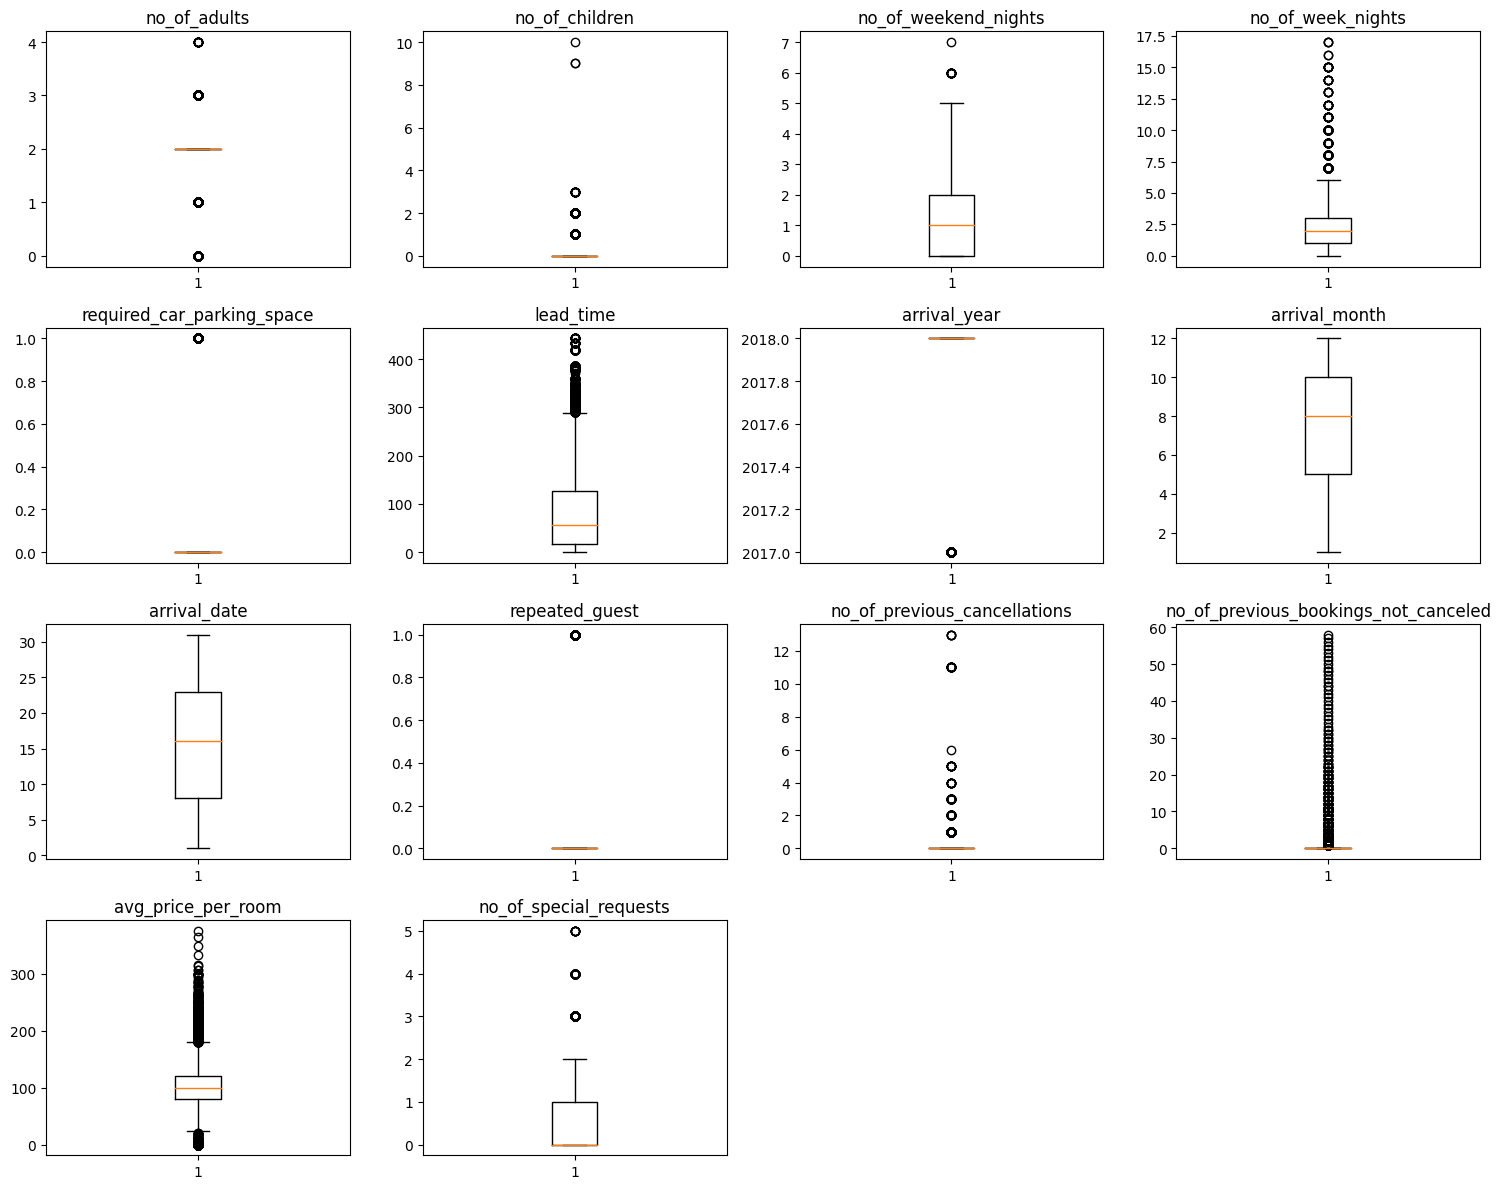

In [48]:
# Checking for outliers using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

No EDA is needed, the data was not manipulated since the first EDA. We will NOT treat the outliers, as the FAQ recommends avoiding outlier treatment to prevent a future error. Or rather, we will not treat them as they are proper values.

## Building a Logistic Regression model

In [49]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
# Defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [51]:
# Drop Booking_ID to avoid memory error
data.drop(columns=['Booking_ID'], inplace=True)

In [52]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# Adding constant
X = sm.add_constant(X)

# Create dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [53]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


In [54]:
# Fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
X_train = X_train.astype(float) #Added to avoid attribute errors

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                  0.3292
Time:                        08:11:57   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      

#### Initial model evaluation

1. Model can incorrectly predict that the customer will cancel their booking.
2. Model can also incorreclty predict that the customer will keep their booking.

* Both wrong predictions are important, as an incorrect cancellation prediction will mean that the hotel may not have enough resources to provide adequate customer service, negatively impacting brand equity.
* An incorrect booking prediction that is canceled will cause the hotel to incur unforeseen costs.

* Hotel should look to mximize F1 Score, indicating an increase chance of minimizing false negatives and false positives.

In [55]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80596,0.63410,0.73961,0.68280


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [56]:
# Function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [57]:
checking_vif(X_train)

,feature,VIF
0,const,39491186.47744
1,no_of_adults,1.34849
2,no_of_children,1.97862
3,no_of_weekend_nights,1.06949
4,no_of_week_nights,1.09567
5,required_car_parking_space,1.03998
6,lead_time,1.39518
7,arrival_year,1.43167
8,arrival_month,1.27637
9,arrival_date,1.00674


All VIF values are below 5, so there is no multicollinearity.
* We can ignore the dummy variables

### Dealing with high p-value variables
* Drop the predictor variables with a p-value greater than 0.05 as they do not significantly impact the target variable.
* P-values can sometimes change after dropping a variable. So, do not drop all variables at once.
* Instead:
  * Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  * Generate a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  * Repeat the previous two steps till there are no columns with p-value greater than 0.05

In [58]:
# Initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [59]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [60]:
# Fitting logistic regression model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
X_train1 = X_train1.astype(float) #Added to avoid Attribute errors

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                  0.3282
Time:                        08:12:00   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612      0.000   -1152.953    -680.776
no_of_adults                       0.1087      0.037      2.916      0.

In [61]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80537,0.63243,0.73900,0.68157


* Remaining variables have a p-value < 0.05.
* We can now say that lg1 is the best model for making any inference.
* The performance on the training data matches the data before dropping the variables with the high p-value.

#### Coefficient interpretations
* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, and some other variables are negative, indicating that an increase in these variables will lead to decreasing the chances of a customer canceling their booking.
* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, lead_time, avg_price_per_room, type_of_meal_plan, and a few others are positive, indicating that an increase in these variables will lead to increasing the chances of a customer canceling their booking.

#### Checking performance model on test set

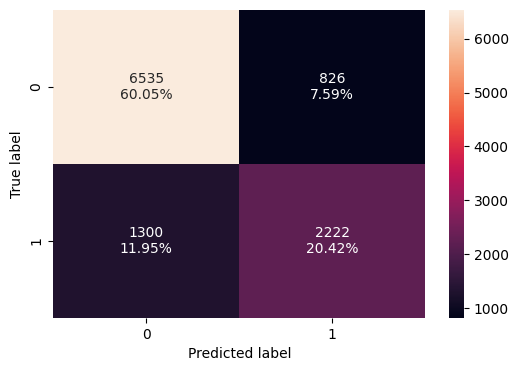

In [62]:
# Creating confusion matrix
X_test1 = X_test1.astype(float) #Added to avoid Attribute errors
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [63]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [64]:
# Converting coefficients to odds
odds = np.exp(lg1.params)

# Finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# Removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11487,1.16411,1.11466,1.04260,0.20298,1.01583,1.57291,0.95841,0.06484,1.25705,1.01937,0.22993,1.17855,1.33103,0.70069,0.75327,0.47893,0.38034,0.23840,0.45262,0.16771
Change_odd%,-100.00000,11.48701,16.41072,11.46616,4.25996,-79.70242,1.58342,57.29054,-4.15858,-93.51608,25.70460,1.93739,-77.00672,17.85489,33.10347,-29.93109,-24.67346,-52.10654,-61.96631,-76.15999,-54.73798,-83.22899


#### Coefficient interpretations

* no_of_adults: Holding all other features constant, a 1 unit change in the number of adults will increase the odds of a booking getting canceled by 1.11 times, or an 11.49 percent increase in the odds of a cancelation.
* no_of_children: Holding all other features constant, a 1 unit change in the number of children will increase the odds of a booking getting canceled by 1.16 times, or a 16.41 percent increase in the odds of a cancelation.
* no_of_weekend_nights: Holding all other features constant, a 1 unit change in the number of weekend nights will increase the odds of a booking getting canceled by 1.11 times, or an 11.47 percent increase in the odds of a cancelation.
* no_of_week_nights: Holding all other features constant, a 1 unit change in the number of weeknights will increase the odds of a booking getting canceled by 1.04 times, or a 4.26 percent increase in the odds of a cancelation.
* required_car_parking_space: The chances of a customer needing a parking space are 0.2 times less than a customer who does not require a car parking space, or a 79.70 percent decrease in the chances of a customer canceling their booking.
* lead_time: Holding all other features constant, a 1 unit change in the lead time will increase the odds of a booking getting canceled by 1.01 times, or a 1.58 percent increase in the odds of a cancelation.
* repeated_guest: The chances of a customer being a repeat guest are 0.06 times less than a customer who is not a repeat guest, or a 93.52 percnet decrease in the chances of a customer canceling their booking.
* no_of_special_requests: Holding all other features constant, a 1 unit change in the number of special requests will decrease the odds of a booking getting canceled by 0.22 times, or a 77 percent decrease in the odds of a cancelation.
* avg_price_per_room: Holding all other features constant, a 1 unit change in the average price per room will increase the odds of a booking getting canceled by 1.02 times, or a 1.94 percent increase in the odds of a cancelation.
* type_of_ meal_plan_Meal Plan 2: The odds of a customer who has selected Meal Plan 2 canceling the booking are 1.18 times more than a customer who has selected a different meal plan option, or a 17.85 percent increase in the chances of a booking being canceled.
* type_of_meal_lan_Not Selected: The odds of a customer who has not selected a meal plan canceling the booking are 1.33 times more than a customer who has selected a different meal plan option, or a 33.10 percent increase in the chances of a booking being canceled.
* room_type_reserved_Room_Type_2: The odds of a customer who has selected Room Type 2 canceling the booking are 0.70 times less than a customer who has selected a room type, or a 29.93 percent decrease in the chances of a booking being canceled.
* room_type_reserved_Room_Type_4: The odds of a customer who has selected Room Type 4 canceling the booking are 0.75 times less than a customer who has selected a room type, or a 24.67 percent decrease in the chances of a booking being canceled.
* room_type_reserved_Room_Type_5: The odds of a customer who has selected Room Type 5 canceling the booking are 0.48 times less than a customer who has selected a room type, or a 52.10 percent decrease in the chances of a booking being canceled.
* room_type_reserved_Room_Type_6: The odds of a customer who has selected Room Type 6 canceling the booking are 0.38 times less than a customer who has selected a room type, or a 61.97 percent decrease in the chances of a booking being canceled.
* room_type_reserved_Room_Type_7: The odds of a customer who has selected Room Type 7 canceling the booking are 0.24 times less than a customer who has selected a room type, or a 76.16 percent decrease in the chances of a booking being canceled.
* market_segment_type_Corporate: The odds of a customer who is from the Corporate market segment canceling the booking are 0.45 times less than a customer from a different market segment, or a 54.74 percent decrease in the chances of a booking being canceled.
* market_segment_type_Offline: The odds of a customer who is from the Offline market segment canceling the booking are 0.17 times less than a customer from a different market segment, or a 83.23 percent decrease in the chances of a booking being canceled.

#### Checking model performance on the training set

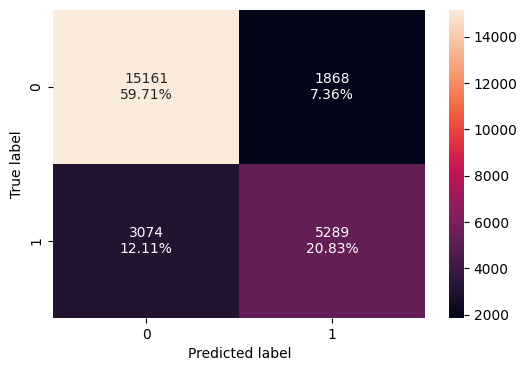

In [65]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [66]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80537,0.63243,0.73900,0.68157


#### ROC-AUC
* ROC-AUC on training set

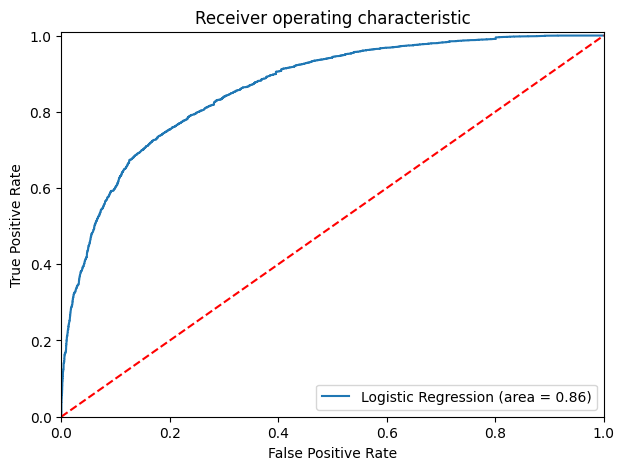

In [67]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC score of 0.86 on training is good.

## Model performance evaluation

### Model Performance Improvement

*   Investigate if the recall score can by improved further by changing the model threshold using the AUC-ROC curve



#### Optimal threshold using AUC-ROC curve

In [68]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.36960379158930723


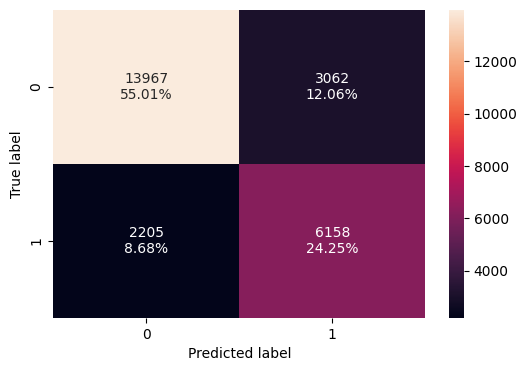

In [69]:
# Creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [70]:
# Checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79257,0.73634,0.66790,0.70045


#### Checking the performance on the test set

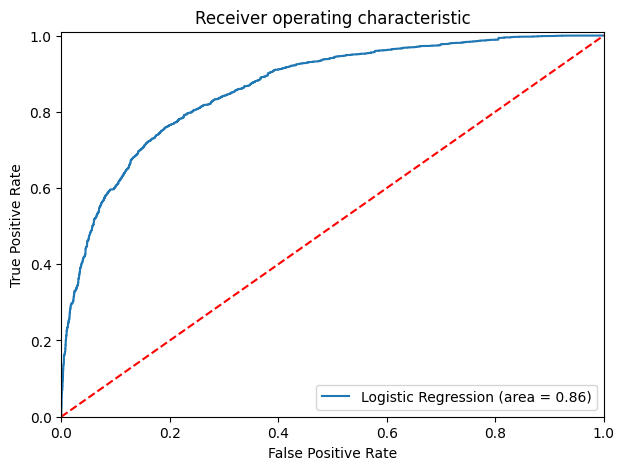

In [71]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

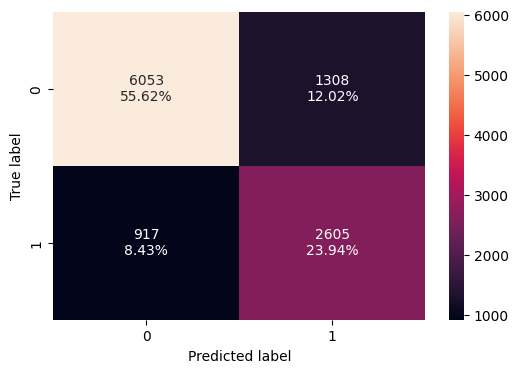

In [72]:
# Creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [73]:
# Checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


#### Investigating a potential better threshold using Precision-Recall

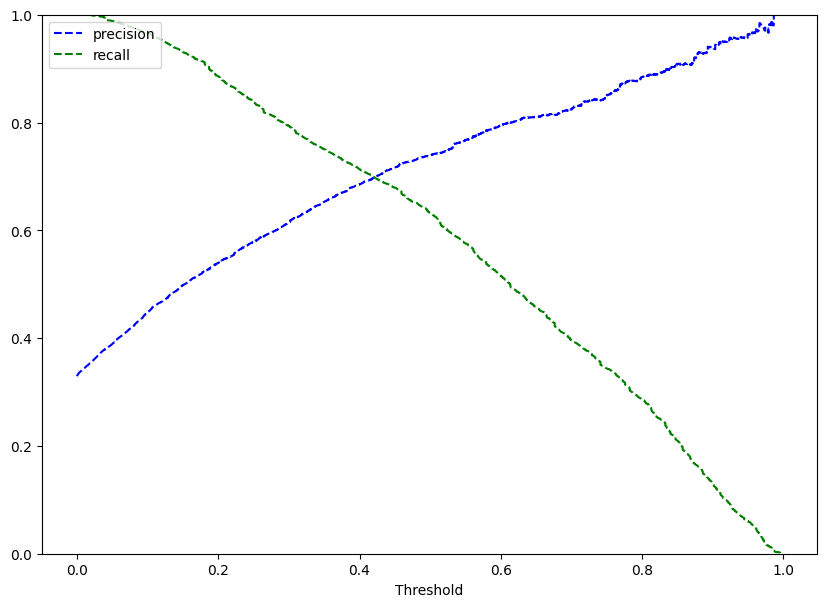

In [74]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* We get a balanced precision and recall at 0.42

In [75]:
# Setting the threshold
optimal_threshold_curve = 0.42

#### Checking model performance on training set

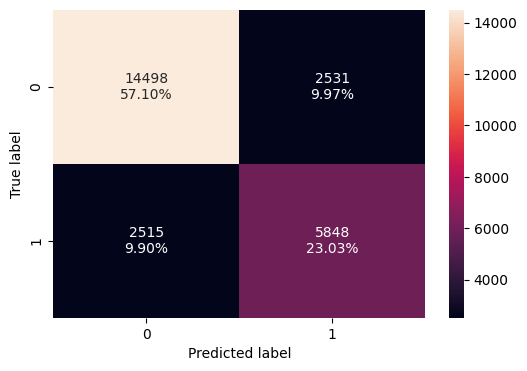

In [76]:
# Creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)

In [77]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69927,0.69794,0.69860


#### Checking the Performance on the test set

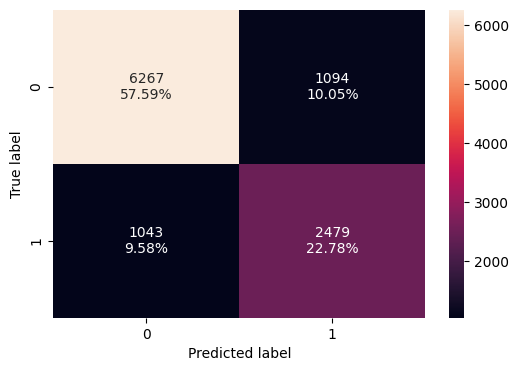

In [78]:
# Creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)

In [79]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


## Final Model Summary

In [80]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80537,0.79257,0.80128
Recall,0.63243,0.73634,0.69927
Precision,0.73900,0.66790,0.69794
F1,0.68157,0.70045,0.69860


In [81]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80364
Recall,0.63089,0.73964,0.70386
Precision,0.72900,0.66573,0.69381
F1,0.67641,0.70074,0.69880


Observations:

* We have been able to build a predictive model that can be used to predict the booking status of a reservation with an F1 score of 0.69 on the training set and formulate policies accordingly.
* All the logistic regression models have given a generalized performance on the training and test set.
* Using the model with the default threshold, the model will give a low recall but good precision score - The hotel will be able to predict which bookings will not be canceled and will be able to provide adequate services to those customers which help in maintaining the brand equity but will potentially lose out on resources.
* Using the model with the 0.37 threshold will give a high recall but low precision score - The hotel will be able to conserve resources by correclty predicting the bookigns which are likely to be canceled, but may negatively impact brand equity.
* Using the model with a 0.42 threshold will give a balanced recall and precision score - The hotel will be able to maintain a balance between resources and brand equity.
* Coefficient of some levels of no_of_previous_cancellations, type_of_meal_plan, no_of_children, no_of_adults, no_of_weekend_nights, no_of_week_nights, lead_time and avg_price_per_room are positive. An increase in these terms will lead to an increase in the chances of a booking being canceled.
* Coefficient of required_car_parking_space, repeated_guest, noof_previous_bookings_not_canceled, _no_of_special_requests, room_type, and market_segment are negative and an increase in these will lead to a decrease in chances of a booking being canceled.



## Building a Decision Tree model

In [82]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [83]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


In [84]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [85]:
# Function to plot the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [86]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

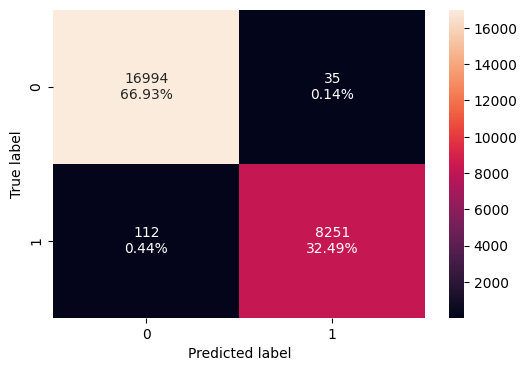

In [87]:
confusion_matrix_sklearn(model, X_train, y_train)

In [88]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


* Almost zero errors on the training set and each sample has been classified correctly.
* Model has performed well on training set.

#### Checking model performance on testing set

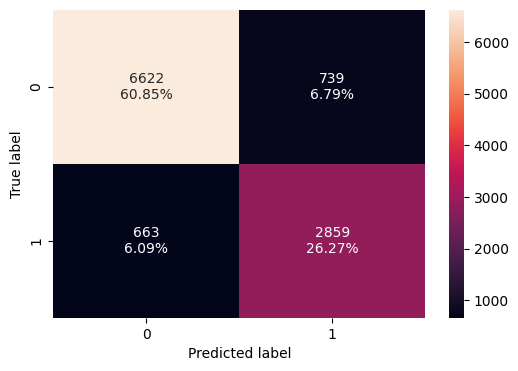

In [89]:
confusion_matrix_sklearn(model, X_test, y_test)

In [90]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


* The decision tree model is overffiting the data, which is as expected, and not able to generalize well on the test set.
* Pruning will be required.

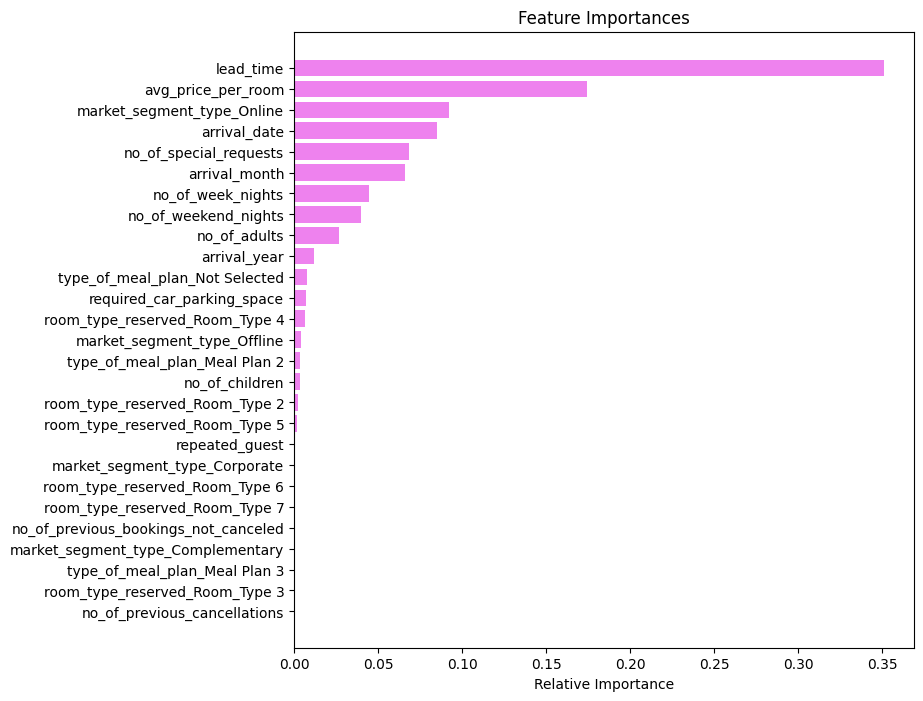

In [91]:
# Checking important features before pruning
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Performing Pruning

#### Pre-Pruning

In [92]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

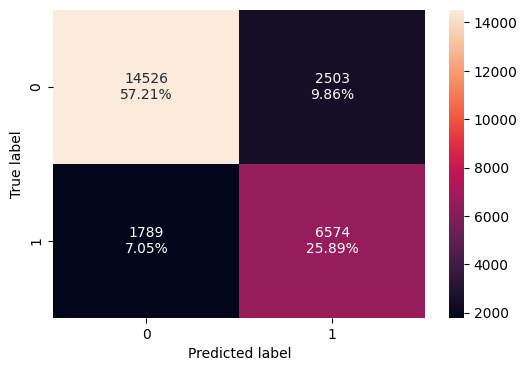

In [93]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [94]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


#### Checking performance on test set

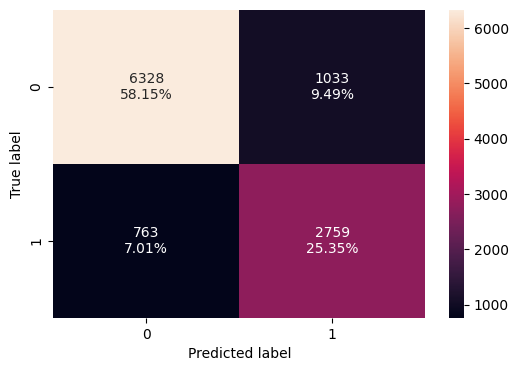

In [95]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [96]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


#### Visualizing the decision tree

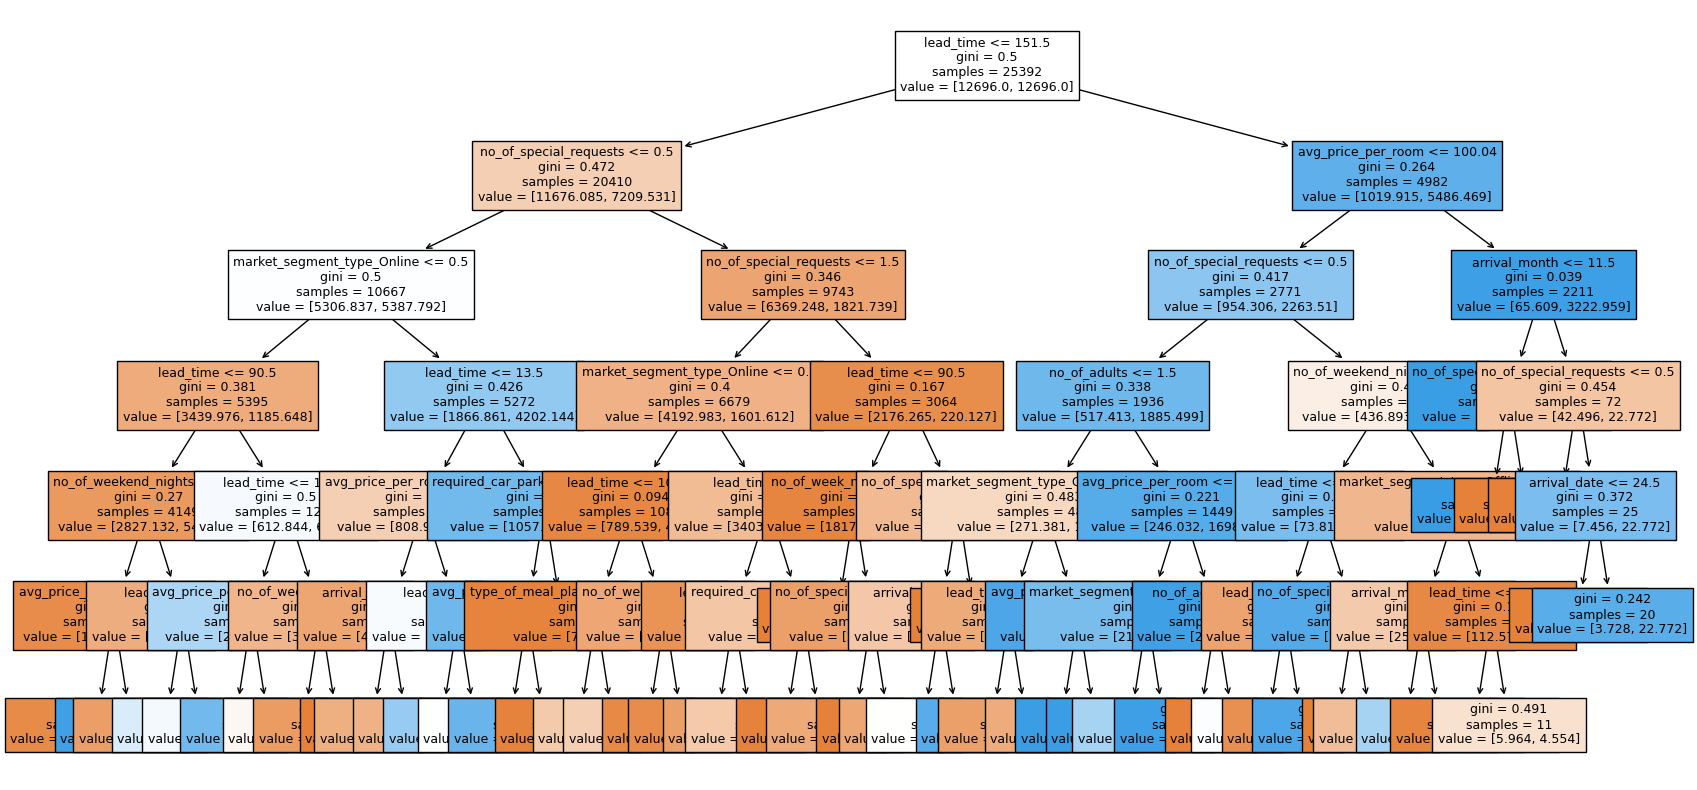

In [97]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [98]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

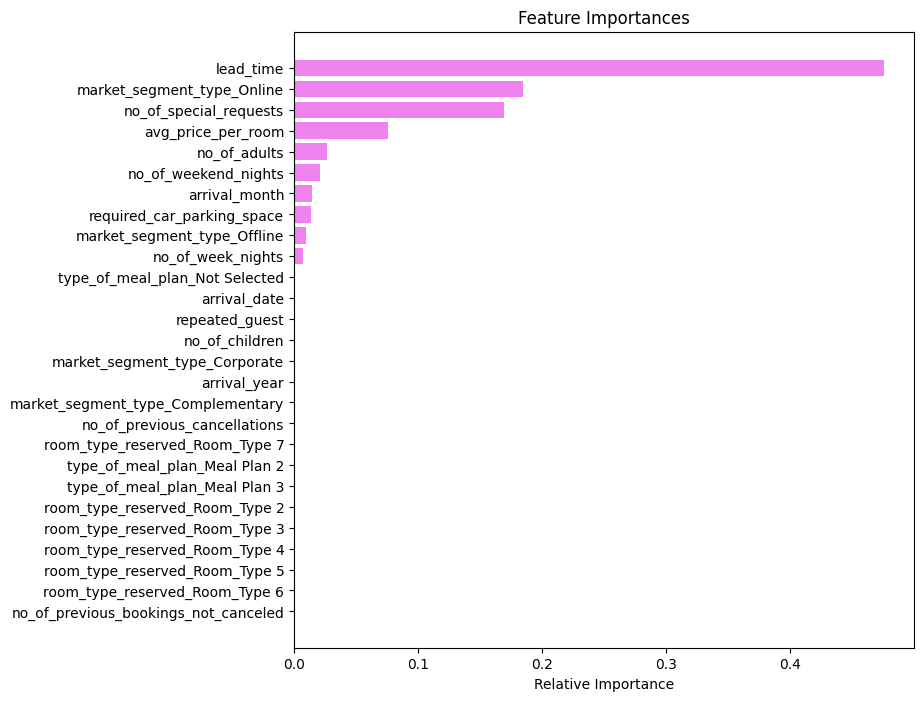

In [99]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Decision Tree Observations
* We can observe that the tree has become simpler and the rules of the tree are readable.
* The model performance of the model has been generalized
* The most important features indicated are:
  * Lead Time
  * Market Segment - Online
  * Number of Special Requests
  * Average Price Per Room
* 151 days has been identified as a threshold value making the first split in the model.
  * Bookings made > 151 days before the arrival date:
    * If the average price per room is > 100 per night, and the arrival month is in December, then the booking is less likely to be canceled.
    * If the average price per room is less than or equal to 100 per night and the number of special requests is zero, then the booking is likely to be canceled.
  * Bookings bade < 151 days before the arrival date:
    * If there is at least 1 special request, the booking is less likely to be canceled
    * If there were no special requests and the booking was made online, it is more likely to get canceled. If the booking was not done online, it is less likely to be canceled.

#### Cost Complexity Pruning

In [100]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [101]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1853,0.00890,0.32806
1854,0.00980,0.33786
1855,0.01272,0.35058
1856,0.03412,0.41882


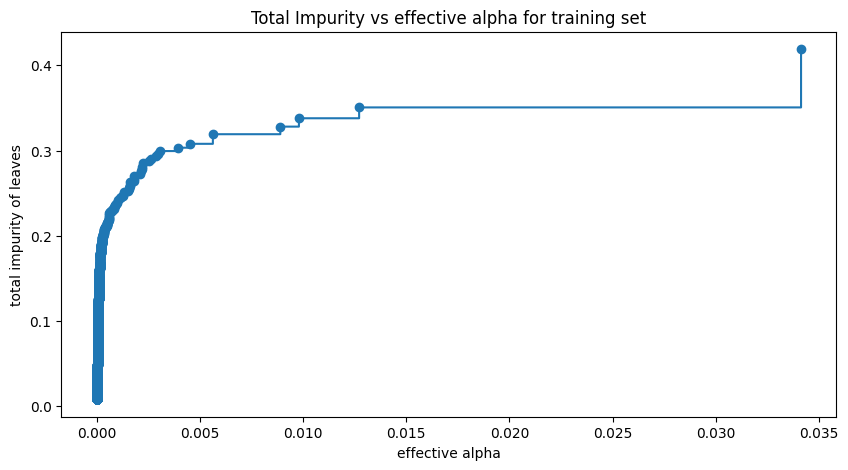

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [103]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


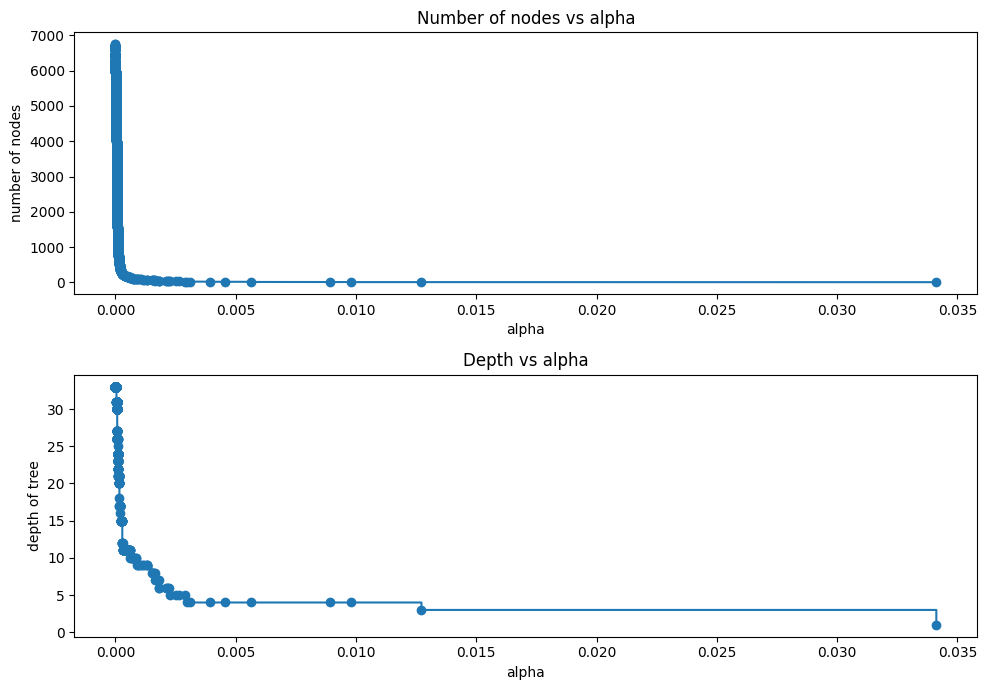

In [104]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [105]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

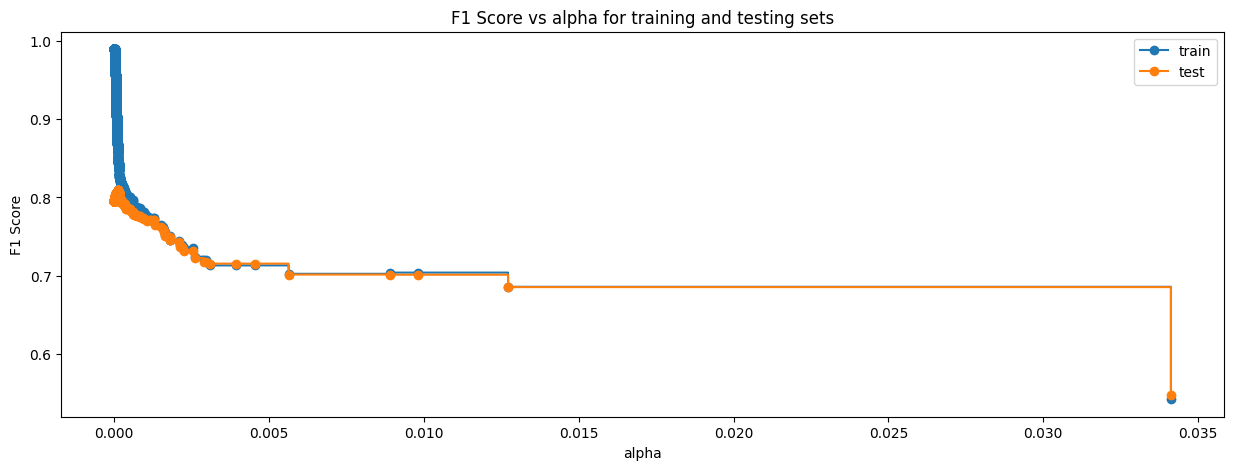

In [106]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [107]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


#### Checking performance on the training set

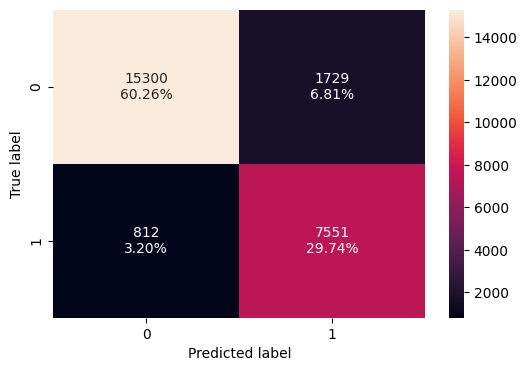

In [108]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [109]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89993,0.90291,0.81369,0.85598


#### Checking performance on the test set

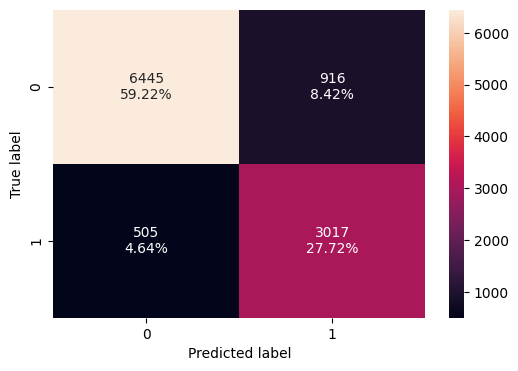

In [110]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [111]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86943,0.85662,0.76710,0.80939


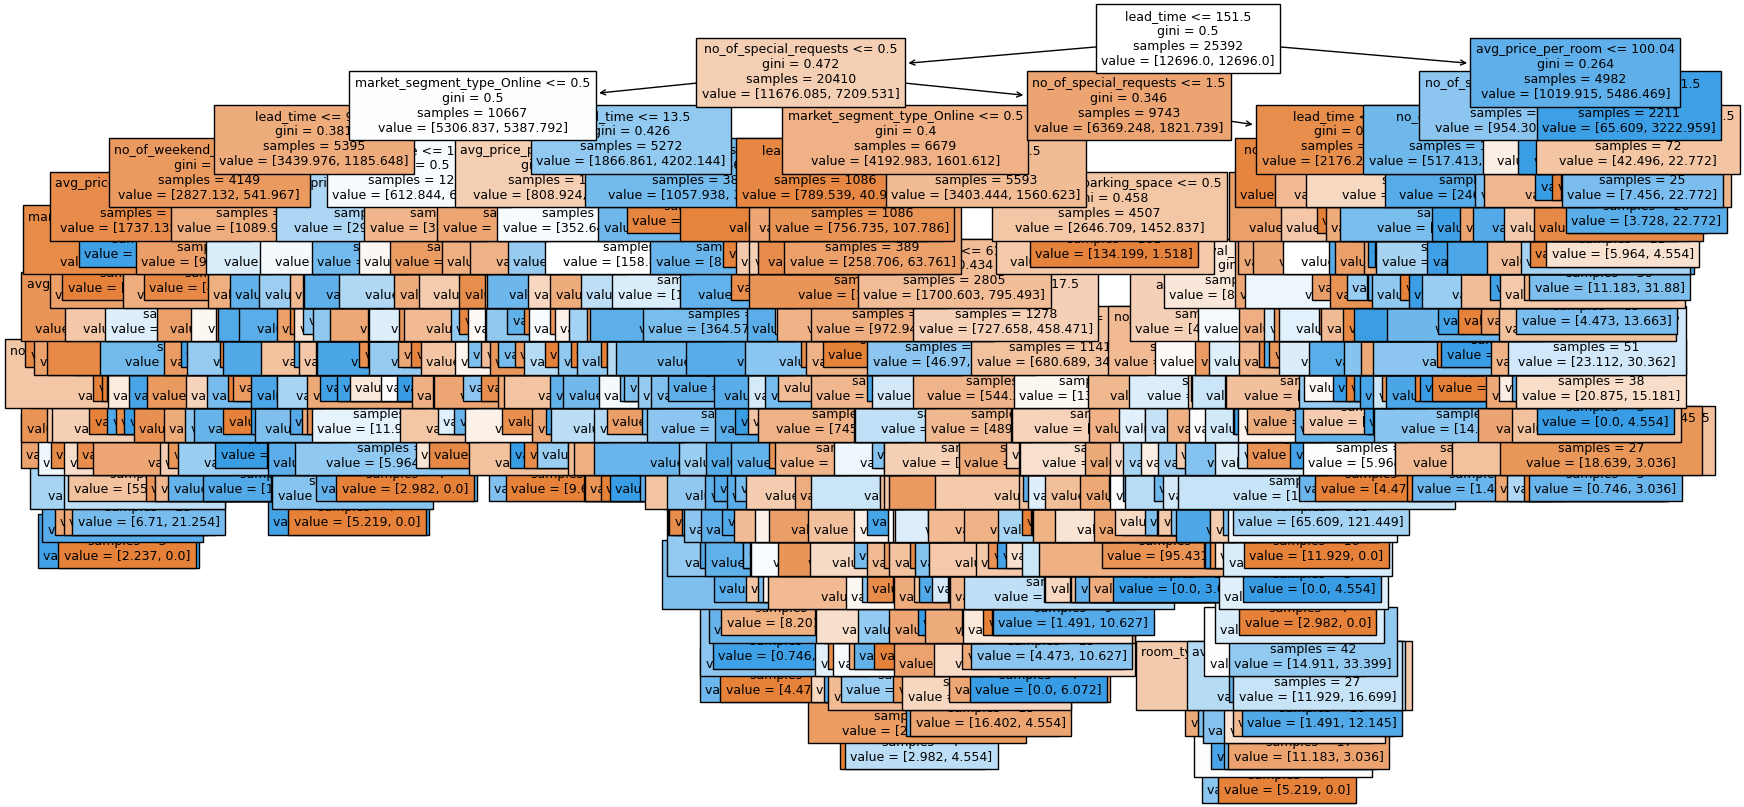

In [112]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [113]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

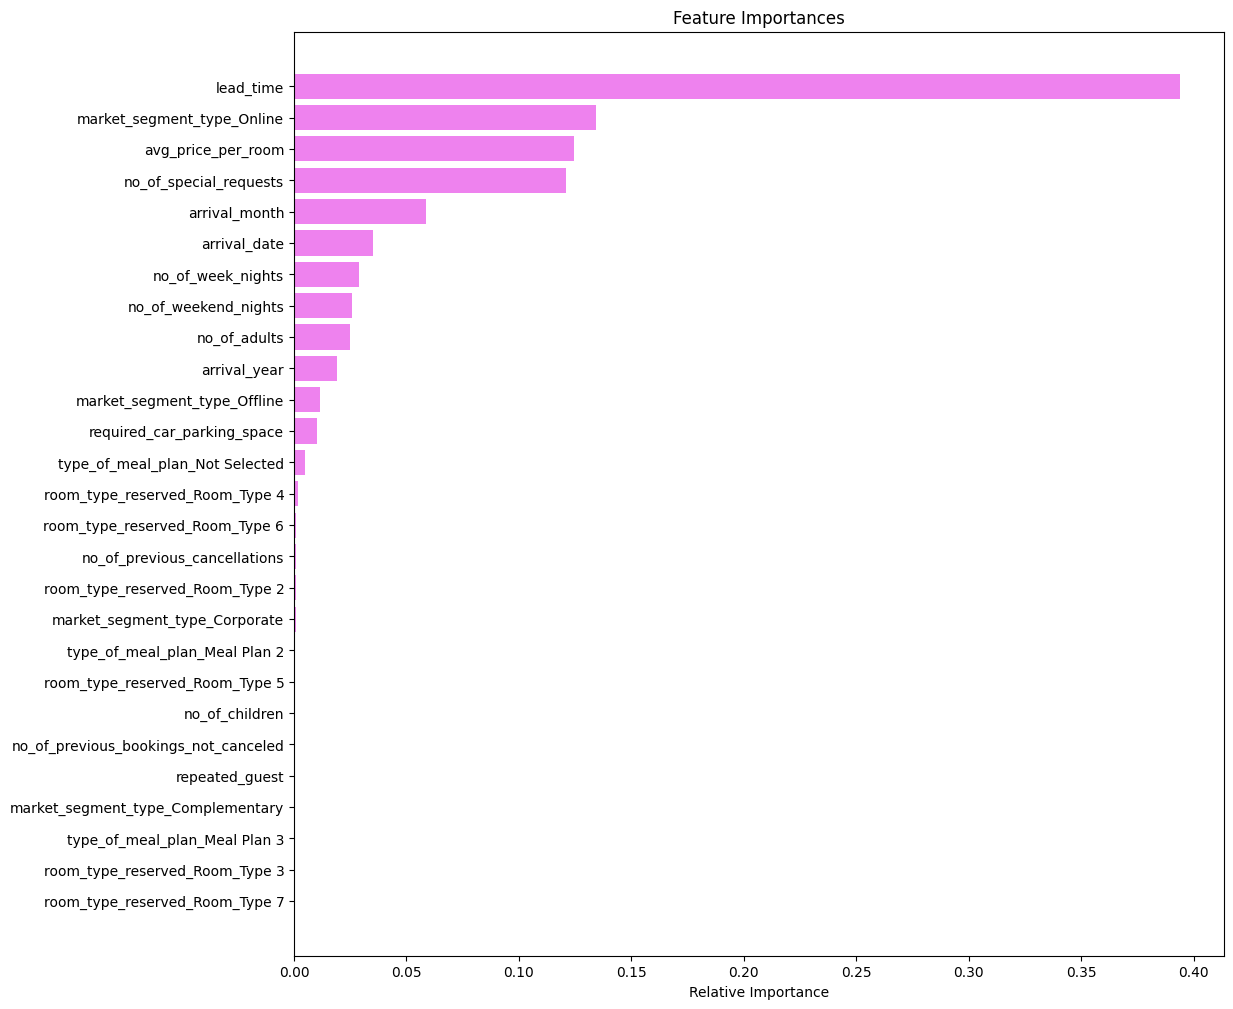

In [114]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations from new tree
* Tree has become much more complex.
* The feature importance is the same as the pre-pruned tree.

## Model Performance Comparison and Conclusions

In [115]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89993
Recall,0.98661,0.78608,0.90291
Precision,0.99578,0.72425,0.81369
F1,0.99117,0.75390,0.85598


In [116]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86943
Recall,0.81175,0.78336,0.85662
Precision,0.79461,0.72758,0.76710
F1,0.80309,0.75444,0.80939


#### Observations on comparisons
* Decision tree model with default parameters is overfitting the training data and is not able to generalize very well.
* The pre-pruned tree has given a generalized performance with balanced values of precision and recall.
* The post-pruned tree has a high F1 score when compared to the default and pre-pruned trees, but the difference between recall and precision is high.
* The hotel will be able to maintain a balanced between resources and brand equity by utilizing the pre-pruned model.

## Actionable Insights and Recommendations

- The Decision Tree model performs better on the dataset.
- Lead Time, Number of Special Requests, and Average Price Per Room are all important in both models.
- The Logistic Regression model indicates a positive relation with bookings for Lead Time and Average Price Per Room with bookings being canceled, while Number of Special Requests has a negative relation.
- The model built can be used to predict if a booking will be canceled or not and can correctly identify 85.7 percent of booking statuses.
- Lead time, average price per room, and number of special requests are the most important variables in predicting whether a booking will be canceled or not.
- From the decision tree, it has been observed that if the lead time is less than or equal to 151 days, then the booking is least likely to be canceled.
  - The company should be vigilant for values greater than these in order to prepare for a booking to be canceled.
  - The company should consider sending a reminder for bookings made more than 151 days out to be sent to the customer at the 151 day mark to reconfirm their reservation.
- The company should narrow down the data collected to get more concrete results.
- The company should consider capping the amount of lead time a reservation can be made.
- The company should consider running specials and deals to keep average room prices at 100 less.
- The company should take into account the most popular months for bookings when considering marketing promotions and deals.